___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 Data Cleaning

### Importing Libraries

In [1305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

### Settings

In [1306]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
#%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

In [1307]:
"""params = {
'figure.figsize':(14,7),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'w',
'boxplot.meanprops.markersize': 10.1,
}
# print(plt.style.library)
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.rcParams['figure.figsize'])"""

"params = {\n'figure.figsize':(14,7),\n'figure.titlesize':20,\n'font.size': 15,\n'axes.titlesize': 20,\n'axes.labelsize': 15,\n'xtick.labelsize': 15,\n'ytick.labelsize': 15,\n'legend.fontsize': 15,\n'boxplot.showmeans': True,\n'boxplot.meanprops.marker': 'o',\n'boxplot.meanprops.markeredgecolor': 'k',\n'boxplot.meanprops.markerfacecolor': 'w',\n'boxplot.meanprops.markersize': 10.1,\n}\n# print(plt.style.library)\nplt.rcParams.update(params)\n# plt.rcParams.update(plt.rcParamsDefault)\n# print(plt.rcParams['figure.figsize'])"

## Reading scout_car.json file as a dataframe named df

In [1308]:
df = pd.read_csv("filledverison_scout.csv")

### Creating a copy from df named df_copy

In [1309]:
df_copy = df.copy()

## Checking the dataframe with head, tail and sample

In [1310]:
# Checking the head of df

df.head()

make_model body_type  price       km  type  previous_owners body_color  \
0    Audi A1    Sedans  15770  56013.0  Used              2.0      Black   
1    Audi A1    Sedans  14500  80000.0  Used              1.0        Red   
2    Audi A1    Sedans  14640  83450.0  Used              1.0      Black   
3    Audi A1    Sedans  14500  73000.0  Used              1.0      Brown   
4    Audi A1    Sedans  16790  16200.0  Used              1.0      Black   

  paint_type  nr_of_doors  nr_of_seats gearing_type  cylinders drive_chain  \
0   Metallic          5.0          5.0    Automatic        3.0       front   
1   Metallic          3.0          4.0    Automatic        4.0       front   
2   Metallic          4.0          4.0    Automatic        4.0       front   
3   Metallic          3.0          4.0    Automatic        3.0       front   
4   Metallic          5.0          5.0    Automatic        3.0       front   

                          fuel  co_2_emission emission_class  \
0  Diesel (Particulate Filter)           99.0         Euro 6   
1                      Benzine          129.0         Euro 6   
2  Diesel (Particulate Filter)           99.0         Euro 6   
3  Diesel (Particulate Filter)           99.0         Euro 6   
4  Diesel (Particulate Filter)          109.0         Euro 6   

                                 comfort_convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 entertainment_media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     safety_security  gears  hp_kw  \
0  ABS,Central door lock,Daytime running lights,D...    7.0   66.0   
1  ABS,Central door lock,Central door lock with r...    7.0  141.0   
2  ABS,Central door lock,Daytime running lights,D...    7.0   85.0   
3  ABS,Alarm system,Central door lock with remote...    6.0   66.0   
4  ABS,Central door lock,Driver-side airbag,Elect...    7.0   66.0   

  upholstery_type upholstery_color  displacement_cc  weight_kg  cons_comb  age  
0           Cloth            Black           1400.0     1220.0        3.8  3.0  
1           Cloth             Grey           1800.0     1255.0        5.6  2.0  
2           Cloth            Black           1600.0     1275.0        3.8  3.0  
3           Cloth            Black           1400.0     1195.0        3.8  3.0  
4           Cloth            Black           1400.0     1220.0        4.1  3.0

In [1311]:
# Checking the tail of df

df.tail()

make_model body_type  price      km            type  \
15048  Renault Espace       Van  39950    10.0             New   
15049  Renault Espace       Van  39885  9900.0            Used   
15050  Renault Espace       Van  39875    15.0  Pre-registered   
15051  Renault Espace       Van  39700    10.0  Pre-registered   
15052  Renault Espace       Van  40999  2900.0   Demonstration   

       previous_owners body_color paint_type  nr_of_doors  nr_of_seats  \
15048              0.0       Grey   Metallic          5.0          5.0   
15049              1.0       Grey   Metallic          5.0          5.0   
15050              1.0      White   Metallic          5.0          7.0   
15051              1.0       Grey   Metallic          5.0          7.0   
15052              1.0       Grey   Metallic          5.0          5.0   

      gearing_type  cylinders drive_chain                          fuel  \
15048    Automatic        4.0       front   Diesel (Particulate Filter)   
15049    Automatic        4.0       front  Benzine (Particulate Filter)   
15050    Automatic        4.0       front                        Diesel   
15051    Automatic        4.0       front                        Diesel   
15052    Automatic        4.0         4WD                       Benzine   

       co_2_emission emission_class  \
15048          139.0         Euro 6   
15049          168.0   Euro 6d-TEMP   
15050          139.0   Euro 6d-TEMP   
15051          139.0         Euro 6   
15052          153.0         Euro 6   

                                     comfort_convenience  \
15048  Air conditioning,Automatic climate control,Cru...   
15049  Air conditioning,Automatic climate control,Cru...   
15050  Air conditioning,Armrest,Automatic climate con...   
15051  Air conditioning,Automatic climate control,Cru...   
15052  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
15048  Bluetooth,Digital radio,Hands-free equipment,O...   
15049  Bluetooth,Digital radio,Hands-free equipment,R...   
15050  Bluetooth,Hands-free equipment,On-board comput...   
15051                  Bluetooth,Digital radio,Radio,USB   
15052                                                USB   

                                        extras  \
15048                Alloy wheels,Touch screen   
15049  Alloy wheels,Touch screen,Voice Control   
15050                             Alloy wheels   
15051                Alloy wheels,Touch screen   
15052                Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
15048  ABS,Central door lock,Central door lock with r...    6.0  147.0   
15049  ABS,Adaptive Cruise Control,Blind spot monitor...    7.0  165.0   
15050  ABS,Adaptive Cruise Control,Blind spot monitor...    6.0  146.0   
15051  ABS,Blind spot monitor,Driver-side airbag,Elec...    6.0  147.0   
15052  ABS,Blind spot monitor,Daytime running lights,...    6.0  165.0   

      upholstery_type upholstery_color  displacement_cc  weight_kg  cons_comb  \
15048    Full leather            Brown           2000.0     1758.0        5.3   
15049           Cloth            Brown           1800.0     1708.0        7.4   
15050    Full leather            Black           2000.0     1758.0        5.3   
15051    Part leather            Brown           2000.0     1758.0        5.3   
15052    Full leather            Brown           1800.0     1685.0        6.8   

       age  
15048  0.0  
15049  0.0  
15050  0.0  
15051  0.0  
15052  0.0

In [1312]:
# Checking the df by taking samples

df.sample(10)

make_model      body_type  price        km  type  previous_owners  \
1084         Audi A1        Compact  19000    6900.0  Used              1.0   
6013      Opel Astra  Station wagon   8950  127986.0  Used              1.0   
10506  Opel Insignia  Station wagon  13780  124800.0  Used              1.0   
11330  Opel Insignia  Station wagon  22990   22837.0  Used              1.0   
7531      Opel Astra  Station wagon  17490     100.0  Used              1.0   
3790         Audi A3         Sedans  19950   59300.0  Used              1.0   
12806   Renault Clio  Station wagon   8490   39990.0  Used              1.0   
8634      Opel Corsa         Sedans   8500   34000.0  Used              1.0   
6742      Opel Astra         Sedans  18450   20800.0  Used              1.0   
10618  Opel Insignia  Station wagon  11850  122327.0  Used              1.0   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  cylinders  \
1084       White   Metallic          4.0          5.0    Automatic        3.0   
6013       Black   Metallic          4.0          5.0       Manual        4.0   
10506       Blue   Metallic          4.0          5.0       Manual        4.0   
11330      White   Metallic          5.0          5.0    Automatic        4.0   
7531       Black   Metallic          4.0          5.0       Manual        4.0   
3790       White   Metallic          5.0          5.0    Automatic        4.0   
12806      White   Metallic          5.0          5.0       Manual        4.0   
8634        Grey   Metallic          5.0          5.0       Manual        4.0   
6742       Black   Metallic          4.0          5.0    Automatic        4.0   
10618      Black   Metallic          4.0          5.0       Manual        4.0   

      drive_chain                          fuel  co_2_emission emission_class  \
1084        front                       Benzine          103.0         Euro 6   
6013        front   Diesel (Particulate Filter)          104.0         Euro 6   
10506       front   Diesel (Particulate Filter)          139.0         Euro 6   
11330       front                       Benzine          141.0         Euro 6   
7531        front  Benzine (Particulate Filter)          141.0   Euro 6d-TEMP   
3790        front   Diesel (Particulate Filter)           99.0         Euro 6   
12806       front                       Benzine          116.5         Euro 6   
8634        front                       Benzine          126.0         Euro 6   
6742        front                       Benzine          130.0   Euro 6d-TEMP   
10618       front   Diesel (Particulate Filter)          109.0         Euro 6   

                                     comfort_convenience  \
1084   Air conditioning,Armrest,Automatic climate con...   
6013   Air conditioning,Armrest,Cruise control,Electr...   
10506  Air conditioning,Armrest,Automatic climate con...   
11330  Air conditioning,Armrest,Automatic climate con...   
7531   Air conditioning,Armrest,Automatic climate con...   
3790   Air conditioning,Armrest,Automatic climate con...   
12806  Air conditioning,Multi-function steering wheel...   
8634   Cruise control,Electrical side mirrors,Leather...   
6742   Air conditioning,Automatic climate control,Ele...   
10618  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
1084   Bluetooth,CD player,Hands-free equipment,MP3,O...   
6013   Bluetooth,CD player,Hands-free equipment,On-bo...   
10506  Bluetooth,CD player,Digital radio,Hands-free e...   
11330  Bluetooth,Digital radio,Hands-free equipment,M...   
7531   Bluetooth,Digital radio,Hands-free equipment,O...   
3790   Bluetooth,CD player,Hands-free equipment,MP3,O...   
12806          Bluetooth,MP3,On-board computer,Radio,USB   
8634                                               Radio   
6742    Bluetooth,Hands-free equipment,On-board computer   
10618  Bluetooth,CD player,Hands-free equipment,On-bo...   

                                  

## Checking the summary information of df

In [1313]:
# Checking the summary information of df with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15053 entries, 0 to 15052
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15053 non-null  object 
 1   body_type            15053 non-null  object 
 2   price                15053 non-null  int64  
 3   km                   15053 non-null  float64
 4   type                 15053 non-null  object 
 5   previous_owners      15053 non-null  float64
 6   body_color           15053 non-null  object 
 7   paint_type           15053 non-null  object 
 8   nr_of_doors          15053 non-null  float64
 9   nr_of_seats          15053 non-null  float64
 10  gearing_type         15053 non-null  object 
 11  cylinders            15053 non-null  float64
 12  drive_chain          15053 non-null  object 
 13  fuel                 15053 non-null  object 
 14  co_2_emission        15053 non-null  float64
 15  emission_class       15053 non-null 

## Checking the null values of df

In [1314]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
type                   0
previous_owners        0
body_color             0
paint_type             0
nr_of_doors            0
nr_of_seats            0
gearing_type           0
cylinders              0
drive_chain            0
fuel                   0
co_2_emission          0
emission_class         0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
hp_kw                  0
upholstery_type        0
upholstery_color       0
displacement_cc        0
weight_kg              0
cons_comb              0
age                    0
dtype: int64

## Checking the duplicated values in df

In [1315]:
df.duplicated()

# As it is seen below, there is not any duplicated values.

0        False
1        False
2        False
3        False
4        False
         ...  
15048    False
15049    False
15050    False
15051     True
15052    False
Length: 15053, dtype: bool

# PART- 3 `( Handling With Outliers )`

In [1316]:
df_numeric = df.select_dtypes(exclude="object")
df_categoric = df.select_dtypes(include="object")

In [1317]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15053 entries, 0 to 15052
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            15053 non-null  int64  
 1   km               15053 non-null  float64
 2   previous_owners  15053 non-null  float64
 3   nr_of_doors      15053 non-null  float64
 4   nr_of_seats      15053 non-null  float64
 5   cylinders        15053 non-null  float64
 6   co_2_emission    15053 non-null  float64
 7   gears            15053 non-null  float64
 8   hp_kw            15053 non-null  float64
 9   displacement_cc  15053 non-null  float64
 10  weight_kg        15053 non-null  float64
 11  cons_comb        15053 non-null  float64
 12  age              15053 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.5 MB


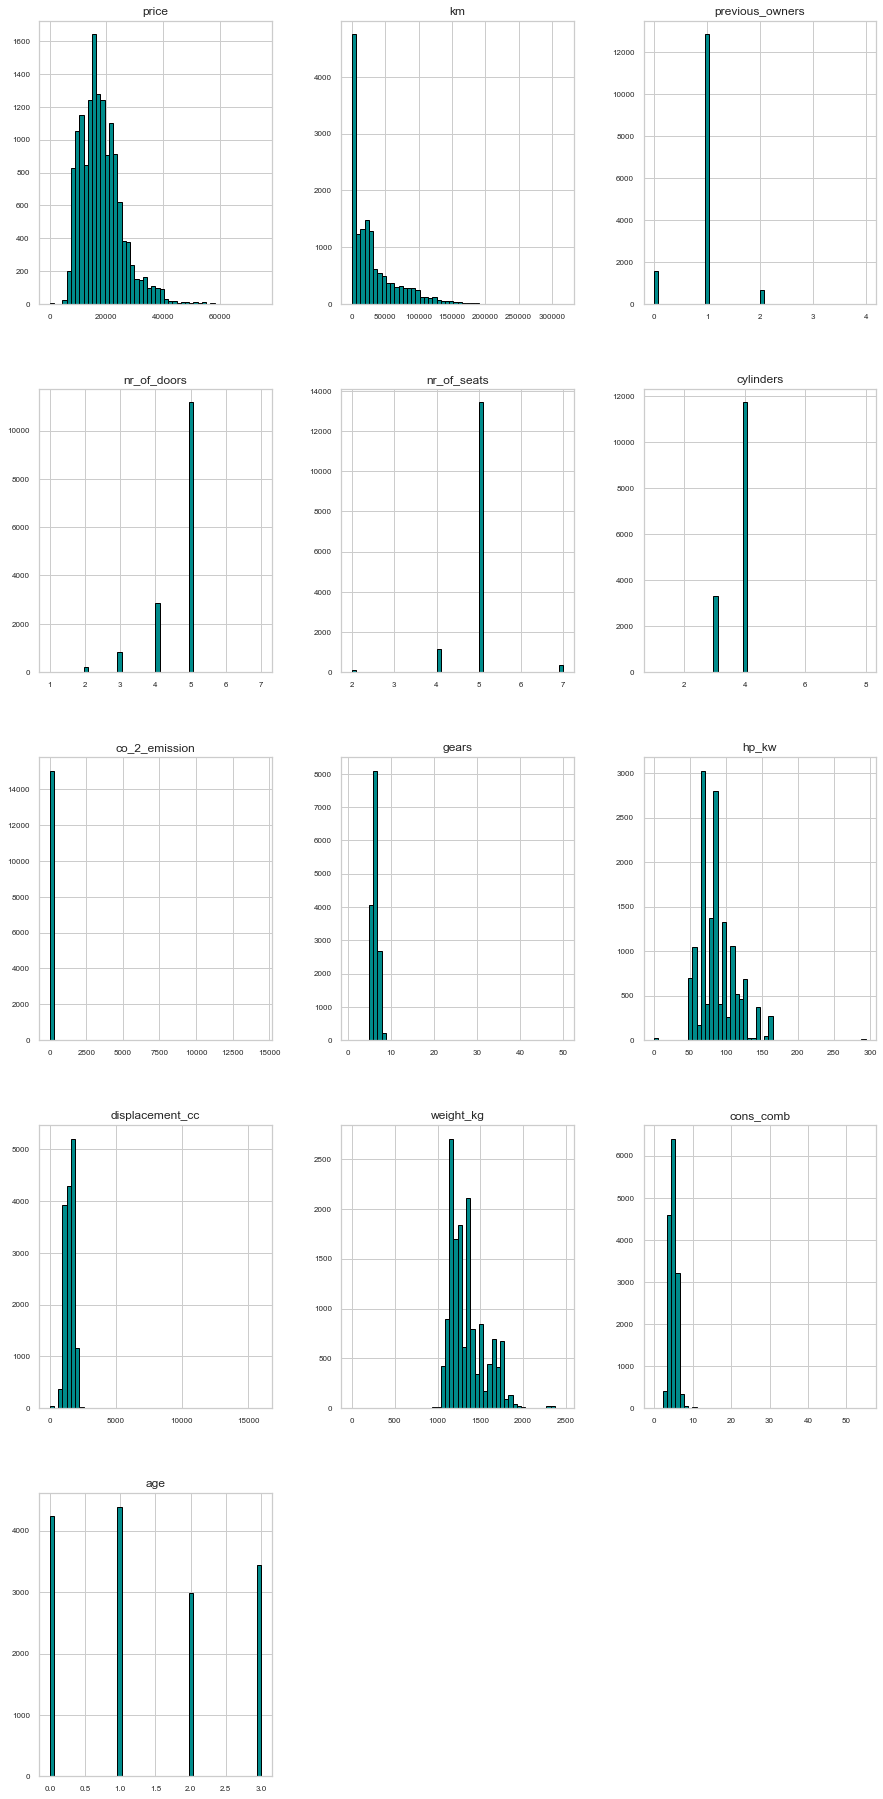

In [1318]:
fig_ = df_numeric.hist(figsize=(15, 100), layout=(15,3),
                         bins=50, color="darkcyan", edgecolor="black", xlabelsize=8, ylabelsize=8)

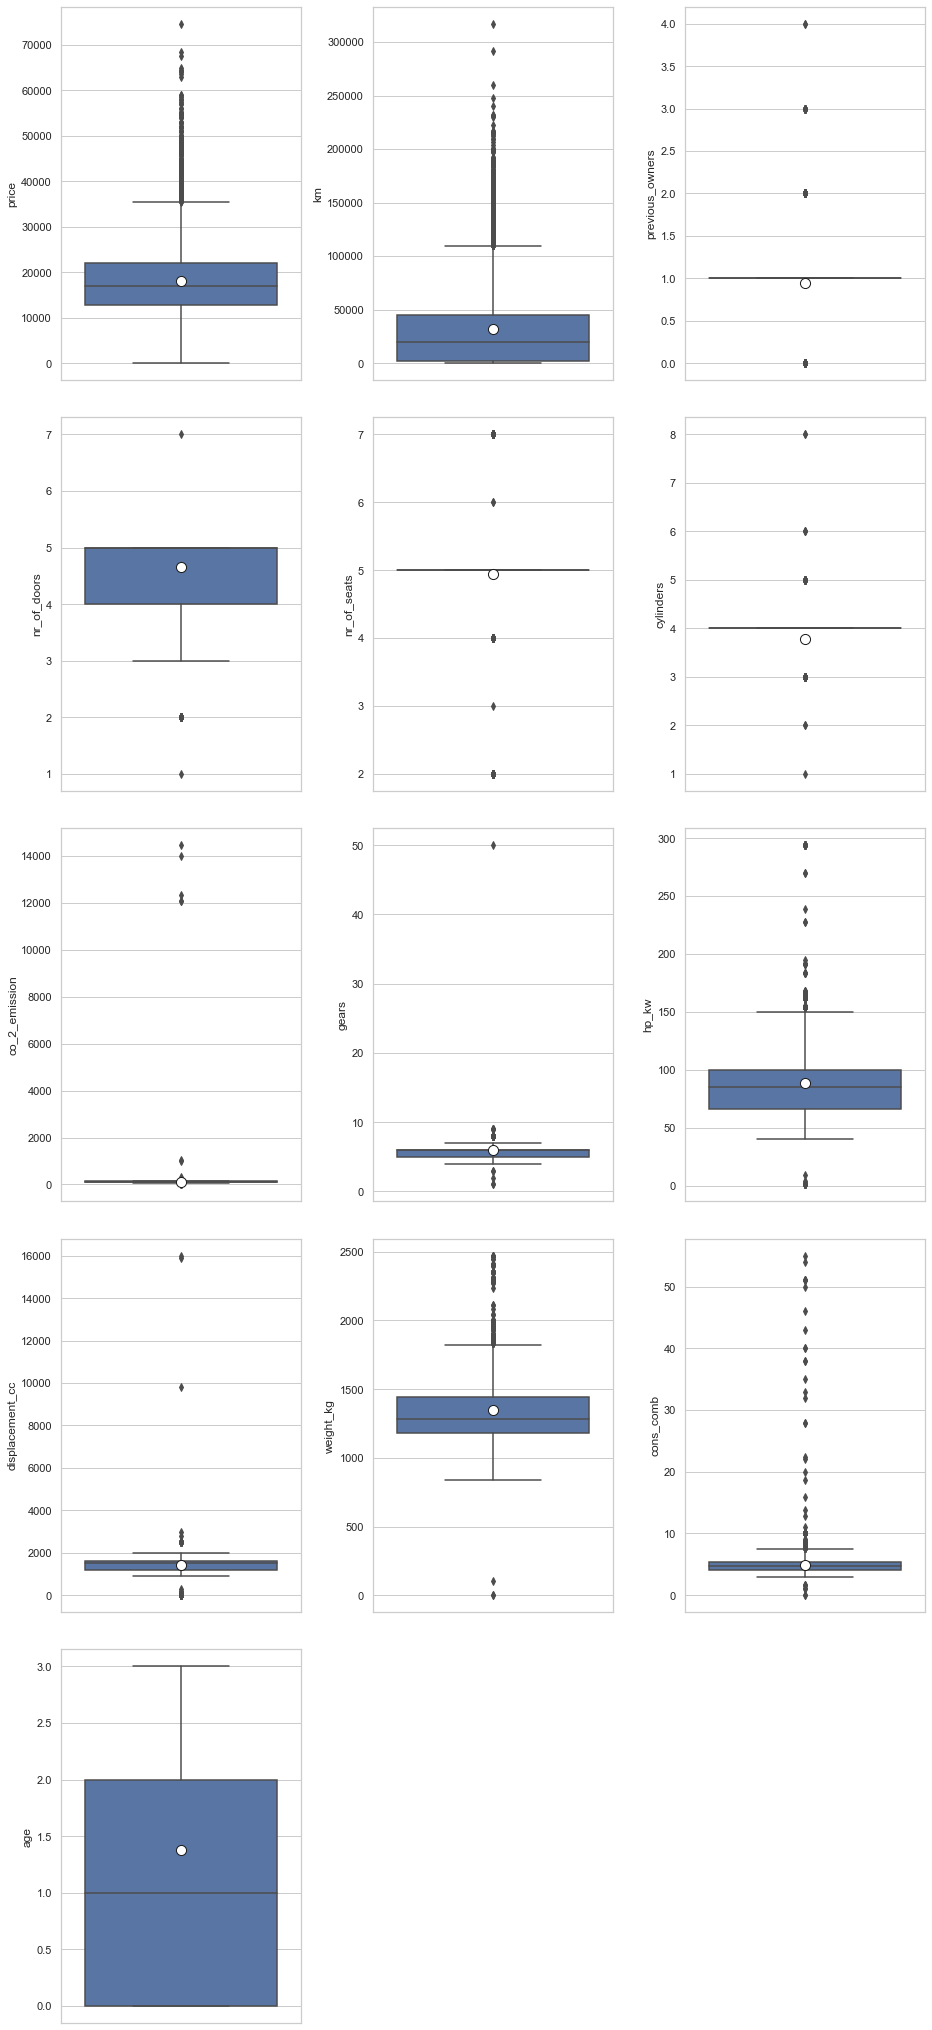

In [1319]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.3,
                    hspace=0.1)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.boxplot(y=col, data=df_numeric)

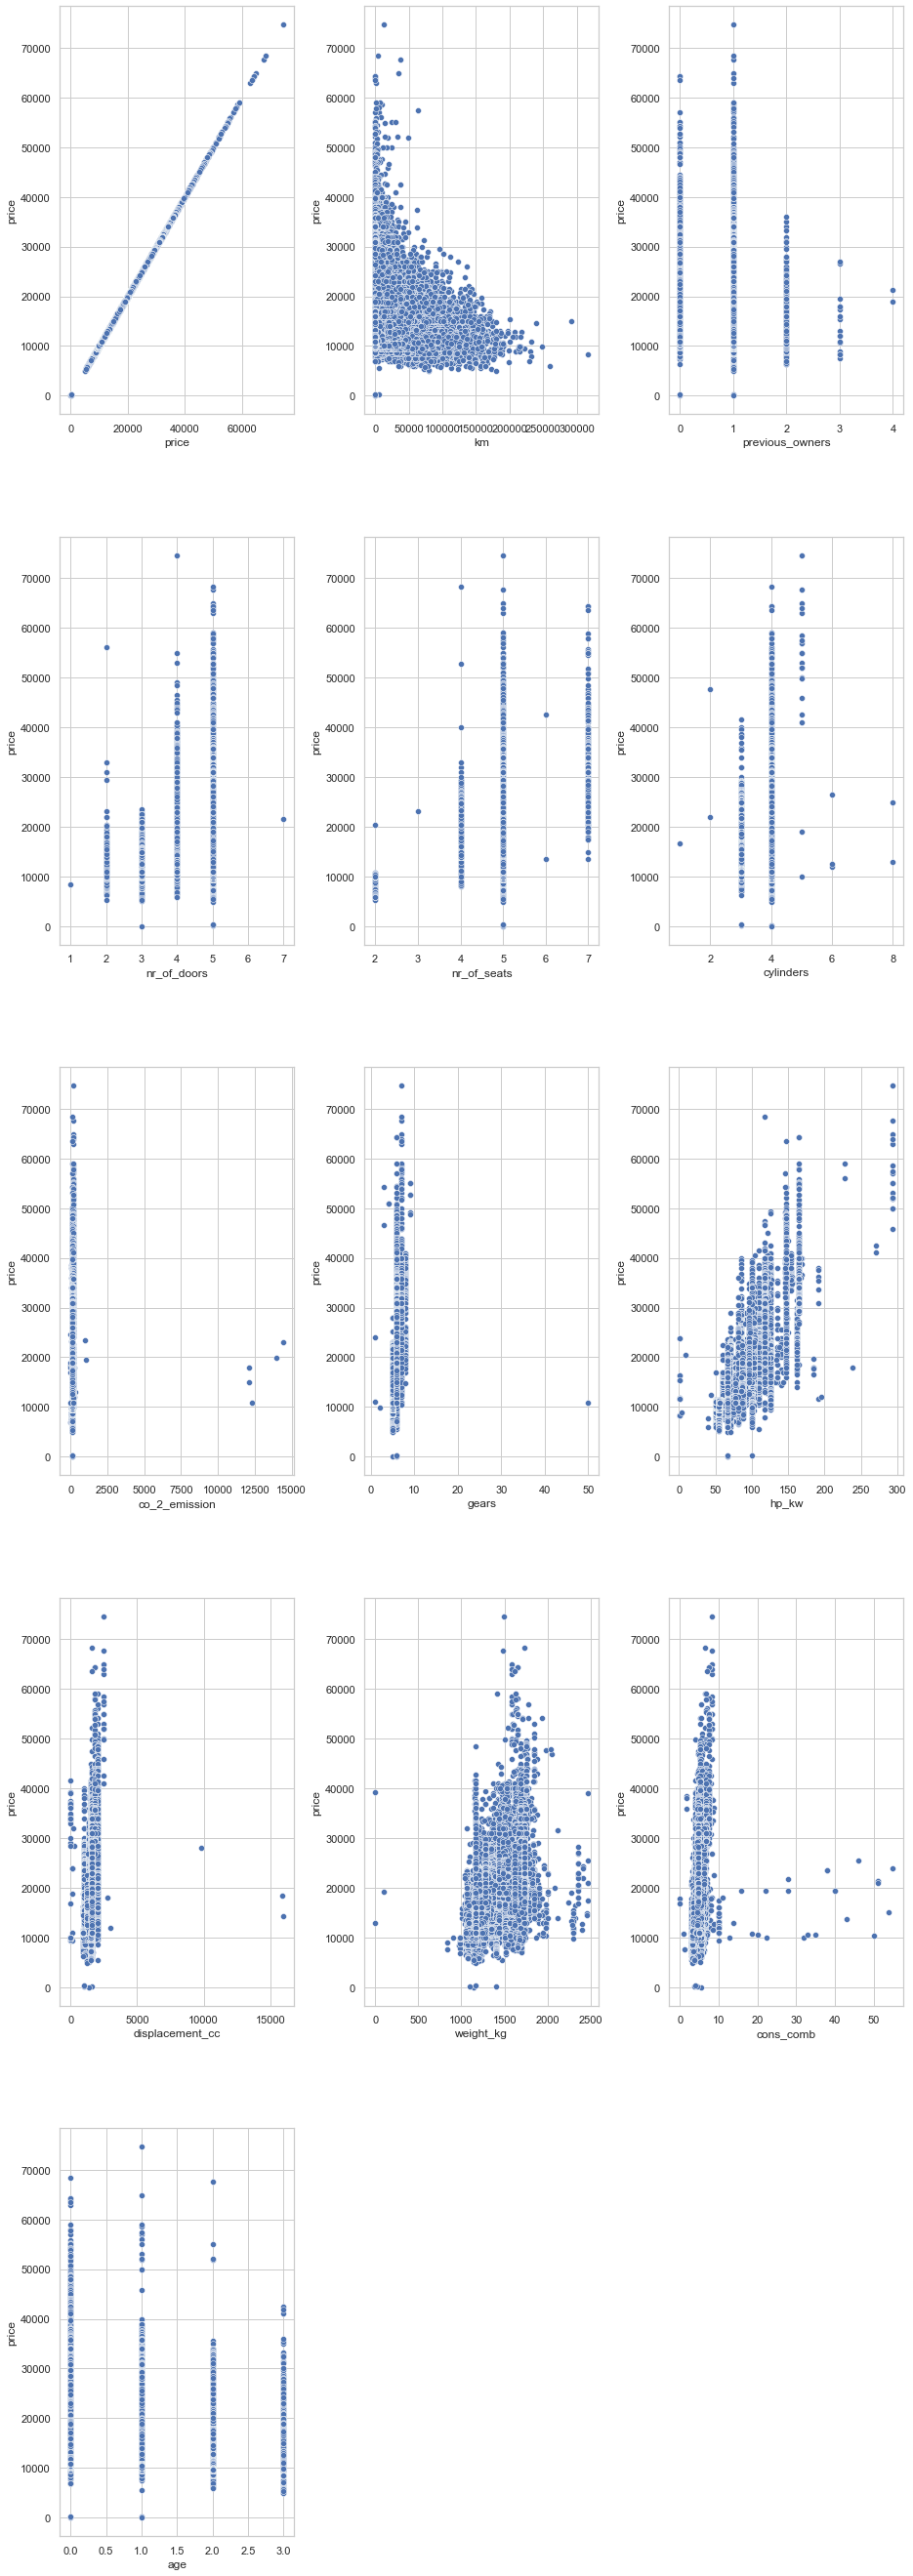

In [1320]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.scatterplot(x=col, y="price", data=df_numeric)

In [1321]:
def iqr_lower_upper (col) :
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 -1.5*iqr
    upper = q3 + 1.5*iqr
    nr_of_extreme = df.loc[(df[col] < lower) | (df[col] > upper)].shape[0]
    print(f"lower limit: {lower},\nupper limit: {upper},\nnumber 0f extreme values: {nr_of_extreme}")

### nr_of_doors

In [1322]:
df.nr_of_doors.value_counts()

5.0    11162
4.0     2872
3.0      823
2.0      194
1.0        1
7.0        1
Name: nr_of_doors, dtype: int64

In [1323]:
df[df.nr_of_doors == 1] 

make_model body_type  price       km  type  previous_owners  \
13067  Renault Clio   Compact   8500  41493.0  Used              1.0   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  cylinders  \
13067      White   Metallic          1.0          5.0       Manual        4.0   

      drive_chain    fuel  co_2_emission emission_class  \
13067       front  Diesel           85.0         Euro 6   

                                     comfort_convenience  \
13067  Air conditioning,Cruise control,Hill Holder,Mu...   

               entertainment_media        extras  \
13067  Bluetooth,On-board computer  Alloy wheels   

                                         safety_security  gears  hp_kw  \
13067  ABS,Central door lock,Daytime running lights,D...    5.0   55.0   

      upholstery_type upholstery_color  displacement_cc  weight_kg  cons_comb  \
13067           Cloth            Black           1500.0     1071.0        3.1   

       age  
13067  3.0

In [1324]:
df.nr_of_doors.replace(1, df.loc[(df.make_model=="Renault Clio")&(df.body_type=="Compact"), "nr_of_doors"].mode()[0], inplace=True)

In [1325]:
df[df.nr_of_doors == 7] 

make_model body_type  price       km  type  previous_owners  \
14382  Renault Espace       Van  21600  78000.0  Used              1.0   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  cylinders  \
14382      Brown   Metallic          7.0          5.0    Automatic        4.0   

      drive_chain    fuel  co_2_emission emission_class  \
14382       front  Diesel          120.0         Euro 6   

                                     comfort_convenience  \
14382  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
14382  Bluetooth,Digital radio,MP3,On-board computer,...   

                          extras  \
14382  Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
14382  ABS,Blind spot monitor,Central door lock,Dayti...    6.0  118.0   

      upholstery_type upholstery_color  displacement_cc  weight_kg  cons_comb  \
14382    Full leather            Brown           1600.0     1734.0        4.6   

       age  
14382  3.0

In [1326]:
df.nr_of_doors.replace(7, df.loc[(df.make_model=="Renault Espace")&(df.body_type=="Van"), "nr_of_doors"].mode()[0], inplace=True)

### nr_of_seats

In [1327]:
df.nr_of_seats.value_counts()

5.0    13426
4.0     1156
7.0      362
2.0      106
6.0        2
3.0        1
Name: nr_of_seats, dtype: int64

In [1328]:
iqr_lower_upper("nr_of_seats")

lower limit: 5.0,
upper limit: 5.0,
number 0f extreme values: 1627


In [1329]:
df[(df.nr_of_seats == 3)]["nr_of_seats"]

1542    3.0
Name: nr_of_seats, dtype: float64

### displacement_cc

In [1330]:
df.displacement_cc.value_counts()

1600.0     4997
1400.0     2918
1000.0     2527
1500.0     1367
2000.0     1169
1200.0     1138
900.0       379
1100.0      262
1800.0      207
0.0          38
2500.0       20
1300.0       12
100.0         7
1700.0        3
1900.0        2
15900.0       1
2800.0        1
9800.0        1
3000.0        1
16000.0       1
300.0         1
200.0         1
Name: displacement_cc, dtype: int64

In [1331]:
iqr_lower_upper("displacement_cc")

lower limit: 600.0,
upper limit: 2200.0,
number 0f extreme values: 72


In [1332]:
df.loc[(df.displacement_cc > 2500) | (df.displacement_cc < 900), "displacement_cc"] = np.nan

In [1333]:
df["displacement_cc"] = df.groupby(["make_model", "body_type", "gearing_type", "hp_kw"]).displacement_cc.apply(lambda x : x.fillna(x.mode()[0] if any(x.mode()) else df.displacement_cc.mode()[0]))

In [1334]:
df.displacement_cc.value_counts(dropna=False)

1600.0    5022
1400.0    2923
1000.0    2529
1500.0    1369
2000.0    1171
1200.0    1139
900.0      380
1100.0     276
1800.0     207
2500.0      20
1300.0      12
1700.0       3
1900.0       2
Name: displacement_cc, dtype: int64

### cylinders

In [1335]:
iqr_lower_upper("cylinders")

lower limit: 4.0,
upper limit: 4.0,
number 0f extreme values: 3332


In [1336]:
df.cylinders.value_counts(dropna=False)

4.0    11721
3.0     3302
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: cylinders, dtype: int64

In [1337]:
df[(df.cylinders > 6) | (df.cylinders < 3)].index

Int64Index([479, 9474, 10806, 14261, 14972], dtype='int64')

In [1338]:
df.loc[(df.cylinders > 6) | (df.cylinders < 3), "cylinders"] = np.nan

In [1339]:
df.cylinders.value_counts(dropna=False)

4.0    11721
3.0     3302
5.0       22
NaN        5
6.0        3
Name: cylinders, dtype: int64

In [1340]:
df["cylinders"] = df.groupby(["make_model", "body_type","gearing_type", "displacement_cc"]).cylinders.apply(lambda x : x.fillna(x.mode()[0]))

### co_2_emission

In [1341]:
iqr_lower_upper("co_2_emission")

lower limit: 68.0,
upper limit: 164.0,
number 0f extreme values: 259


In [1342]:
df.co_2_emission.value_counts()

120.0     943
104.0     675
99.0      622
97.0      549
103.0     549
         ... 
51.0        1
239.0       1
14.0        1
80.0        1
1060.0      1
Name: co_2_emission, Length: 132, dtype: int64

In [1343]:
df[(df.co_2_emission > 164) | (df.co_2_emission < 68)]["co_2_emission"].count()

259

In [1344]:
df.loc[(df.co_2_emission > 170) | (df.co_2_emission < 60), "co_2_emission"] = np.nan

In [1345]:
df["co_2_emission"] = df.groupby(["body_type", "gearing_type", "fuel", "displacement_cc", "cons_comb"])["co_2_emission"].apply(lambda x : x.fillna(x.median()))

In [1346]:
df.co_2_emission.fillna(method="ffill", inplace=True)

In [1347]:
df.co_2_emission.isnull().sum()

0

### gears

In [1348]:
df_numeric = df.select_dtypes(exclude="object")

In [1349]:
iqr_lower_upper("gears")

lower limit: 3.5,
upper limit: 7.5,
number 0f extreme values: 229


In [1350]:
df.gears.value_counts()

6.0     8096
5.0     4056
7.0     2670
8.0      217
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [1351]:
df.loc[(df.gears > 9) | (df.gears < 5), "gears"] = np.nan

In [1352]:
df.gears.value_counts()

6.0    8096
5.0    4056
7.0    2670
8.0     217
9.0       6
Name: gears, dtype: int64

In [1353]:
df["gears"] = df.groupby(["make_model", "body_type", "age", "gearing_type"]).gears.apply(lambda x: x.fillna(x.median()))

### hp_kw

In [1354]:
df.hp_kw.value_counts().sort_index().head()

1.0     20
4.0      1
9.0      1
40.0     2
44.0     1
Name: hp_kw, dtype: int64

In [1355]:
iqr_lower_upper("hp_kw")

lower limit: 15.0,
upper limit: 151.0,
number 0f extreme values: 378


In [1356]:
df[(df.hp_kw > 290)]["hp_kw"]

3414    294.0
3417    294.0
3419    294.0
3420    294.0
3422    294.0
3423    294.0
3425    294.0
3426    294.0
3427    294.0
3428    294.0
3429    294.0
3430    294.0
3431    294.0
3432    294.0
3433    294.0
3437    294.0
3475    294.0
3476    294.0
Name: hp_kw, dtype: float64

In [1357]:
df.loc[df.hp_kw < 50, "hp_kw"] = np.nan

In [1358]:
df["hp_kw"] = df.groupby(["body_type", "displacement_cc", "cylinders", "fuel"]).hp_kw.apply(lambda x: x.fillna(x.median()))

### weight_kg

In [1359]:
iqr_lower_upper("weight_kg")

lower limit: 788.5,
upper limit: 1832.5,
number 0f extreme values: 264


In [1360]:
df[(df.weight_kg > 2000) | (df.weight_kg < 751)]["weight_kg"]

1078      102.0
7936        1.0
9993     2320.0
10115    2300.0
10133    2300.0
10138    2320.0
10153    2450.0
10161    2450.0
10181    2300.0
10238    2300.0
10258    2300.0
10264    2300.0
10271    2300.0
10282    2295.0
10382    2300.0
10390    2400.0
10421    2300.0
10498    2110.0
10503    2280.0
10522    2300.0
10546    2275.0
10562    2280.0
10575    2400.0
10639    2300.0
10640    2300.0
10925    2270.0
11002    2240.0
11208    2355.0
11532    2080.0
12073    2115.0
12195       1.0
14143    2353.0
14146    2353.0
14152    2353.0
14158    2353.0
14161    2353.0
14186    2471.0
14198    2353.0
14241    2353.0
14285    2353.0
14319    2410.0
14322    2410.0
14329    2410.0
14353    2410.0
14355    2353.0
14366    2471.0
14397    2353.0
14399    2353.0
14407    2353.0
14408    2471.0
14413    2353.0
14441    2471.0
14450    2353.0
14454    2353.0
14457    2044.0
14488    2353.0
14515    2353.0
14517    2353.0
14518    2353.0
14821    2471.0
15020    2037.0
Name: weight_kg, dtype: 

In [1361]:
df.loc[(df.weight_kg < 751), "weight_kg"] = np.nan

In [1362]:
df.groupby(["make_model", "body_type"])["weight_kg"].describe()

count         mean         std     min  \
make_model     body_type                                                
Audi A1        Compact         966.0  1187.315735   65.834387  1010.0   
               Coupe             2.0  1086.500000  108.187338  1010.0   
               Other            13.0  1196.153846   36.637518  1165.0   
               Sedans         1486.0  1228.918573  145.467779  1035.0   
               Station wagon    21.0  1200.904762  100.297011  1125.0   
               Van               1.0  1163.000000         NaN  1163.0   
Audi A2        Off-Road          1.0  1163.000000         NaN  1163.0   
Audi A3        Compact         151.0  1310.801325  165.116808  1155.0   
               Convertible       8.0  1523.750000  120.200725  1355.0   
               Coupe             4.0  1235.750000   50.519798  1163.0   
               Other            16.0  1233.375000   92.133870  1163.0   
               Sedans         2485.0  1372.917103  145.070921  1041.0   
               Station wagon   283.0  1301.275618   84.575756  1163.0   
Opel Astra     Compact         156.0  1292.185897   69.064514  1163.0   
               Coupe             2.0  1350.000000    0.000000  1350.0   
               Off-Road          1.0  1340.000000         NaN  1340.0   
               Other            67.0  1318.671642   56.729659  1163.0   
               Sedans          992.0  1313.770161   67.700575  1163.0   
               Station wagon  1165.0  1390.608584   98.105173  1163.0   
Opel Corsa     Compact        1191.0  1177.753988   51.638587   840.0   
               Coupe            13.0  1179.692308  147.445688  1066.0   
               Off-Road          3.0  1187.666667   42.723920  1163.0   
               Other            87.0  1171.574713   19.631271  1141.0   
               Sedans          851.0  1172.606345   68.303468  1086.0   
               Transporter       7.0  1178.428571   19.242809  1163.0   
               Van               1.0  1124.000000         NaN  1124.0   
Opel Insignia  Compact          26.0  1451.153846  107.989145  1163.0   
               Coupe             1.0  1163.000000         NaN  1163.0   
               Off-Road          7.0  1458.714286  138.594991  1163.0   
               Other            48.0  1514.020833   85.052797  1163.0   
               Sedans          823.0  1529.811665  129.188294  1163.0   
               Station wagon  1575.0  1626.795556  125.302116  1163.0   
               Van               1.0  1163.000000         NaN  1163.0   
Renault Clio   Compact         417.0  1142.824940   63.656685  1052.0   
               Coupe             1.0  1163.000000         NaN  1163.0   
               Off-Road          2.0  1163.500000    2.121320  1162.0   
               Other            52.0  1200.750000   89.961402  1090.0   
               Sedans          837.0  1162.556750  119.476332   900.0   
               Station wagon   310.0  1185.925806   71.208052   980.0   
               Transporter      29.0  1195.241379   32.874931  1087.0   
               Van               2.0  1163.000000    0.000000  1163.0   
Renault Duster Off-Road         34.0  1163.000000    0.000000  1163.0   
Renault Espace Compact           8.0  1638.375000   49.143921  1621.0   
               Coupe             2.0  1163.000000    0.000000  1163.0   
               Off-Road          8.0  1734.000000    0.000000  1734.0   
               Other             7.0  1478.714286  299.959283  1163.0   
               Sedans           21.0  1254.666667  239.235310  1163.0   
               Station wagon    70.0  1701.471429   86.100838  1163.0   
               Transporter      55.0  1960.127273  327.499791  1163.0   
               Van             741.0  1712.870445   96.774700  1163.0   

                                  25%     50%      75%     max  
make_model     body_type                                        
Audi A1        Compact        1165.00  1180.0  1200.00  1792.0  
               Coupe          1048.25  

In [1363]:
df.loc[df.weight_kg < 751, "weight_kg"] = np.nan

df.groupby(["make_model", "body_type"]).weight_kg.apply(lambda x : x.mode()[0])

df.groupby(["make_model", "body_type"]).weight_kg.describe().T

df["weight_kg"] = df.groupby(["gearing_type", "cylinders", "displacement_cc"]).weight_kg.apply(lambda x : x.fillna(x.median()))

### cons_comb

In [1364]:
iqr_lower_upper("cons_comb")

lower limit: 1.8999999999999995,
upper limit: 7.500000000000001,
number 0f extreme values: 127


In [1365]:
df.cons_comb.value_counts().sort_index(ascending=False).head(30)

55.000000     1
54.000000     1
51.000000     4
50.000000     1
46.000000     1
43.000000     1
40.000000     2
38.000000     2
35.000000     1
33.000000     1
32.000000     1
27.966667     1
27.950000     1
22.400000     1
22.000000     1
20.000000     1
18.600000     1
15.933333     1
13.800000     1
12.800000     1
11.000000     1
10.000000    35
9.100000      1
8.700000      3
8.600000      4
8.300000     20
8.200000      1
8.100000      2
8.000000      5
7.900000      2
Name: cons_comb, dtype: int64

In [1366]:
df.loc[(df.cons_comb > 10)|(df.cons_comb<2), "cons_comb"] = np.nan

In [1367]:
#bundan önce değerleri nan a çevir
df["cons_comb"] = df.groupby(["make_model", "body_type", "gearing_type", "fuel","displacement_cc"])['cons_comb'].apply(lambda x : x.fillna(x.median()).fillna(df.cons_comb.median()))

In [1368]:
iqr_lower_upper("price")

lower limit: -675.0,
upper limit: 35525.0,
number 0f extreme values: 465


In [1369]:
df.drop(df[df.price < 4000].index, inplace=True)

In [1370]:
df_numeric.corr()

price        km  previous_owners  nr_of_doors  \
price            1.000000 -0.391503        -0.253351     0.162787   
km              -0.391503  1.000000         0.260773    -0.002205   
previous_owners -0.253351  0.260773         1.000000    -0.125754   
nr_of_doors      0.162787 -0.002205        -0.125754     1.000000   
nr_of_seats      0.249789 -0.015989        -0.024224     0.107490   
cylinders        0.004086  0.237880         0.125094     0.028903   
co_2_emission    0.309754 -0.216892        -0.085187    -0.051687   
gears            0.477430 -0.030552        -0.049625     0.105334   
hp_kw            0.699778  0.014506        -0.074162     0.129349   
displacement_cc  0.289471  0.314463         0.085950     0.092541   
weight_kg        0.440902  0.181324         0.021416     0.146349   
cons_comb        0.154794 -0.196792        -0.094885    -0.024958   
age             -0.457415  0.755540         0.429340    -0.078423   

                 nr_of_seats  cylinders  co_2_emission     gears     hp_kw  \
price               0.249789   0.004086       0.309754  0.477430  0.699778   
km                 -0.015989   0.237880      -0.216892 -0.030552  0.014506   
previous_owners    -0.024224   0.125094      -0.085187 -0.049625 -0.074162   
nr_of_doors         0.107490   0.028903      -0.051687  0.105334  0.129349   
nr_of_seats         1.000000   0.222801       0.275914  0.075104  0.289124   
cylinders           0.222801   1.000000       0.337244  0.103117  0.318332   
co_2_emission       0.275914   0.337244       1.000000  0.083990  0.474360   
gears               0.075104   0.103117       0.083990  1.000000  0.395429   
hp_kw               0.289124   0.318332       0.474360  0.395429  1.000000   
displacement_cc     0.198849   0.720027       0.280465  0.296919  0.609065   
weight_kg           0.314746   0.331271       0.300905  0.298032  0.649692   
cons_comb           0.118965   0.074496       0.473783 -0.005922  0.196144   
age                -0.081222   0.208240      -0.275521 -0.064886 -0.073624   

                 displacement_cc  weight_kg  cons_comb       age  
price                   0.289471   0.440902   0.154794 -0.457415  
km                      0.314463   0.181324  -0.196792  0.755540  
previous_owners         0.085950   0.021416  -0.094885  0.429340  
nr_of_doors             0.092541   0.146349  -0.024958 -0.078423  
nr_of_seats             0.198849   0.314746   0.118965 -0.081222  
cylinders               0.720027   0.331271   0.074496  0.208240  
co_2_emission           0.280465   0.300905   0.473783 -0.275521  
gears                   0.296919   0.298032  -0.005922 -0.064886  
hp_kw                   0.609065   0.649692   0.196144 -0.073624  
displacement_cc         1.000000   0.610946   0.002234  0.221847  
weight_kg               0.610946   1.000000   0.047282  0.099987  
cons_comb               0.002234   0.047282   1.000000 -0.220073  
age                     0.221847   0.099987  -0.220073  1.000000

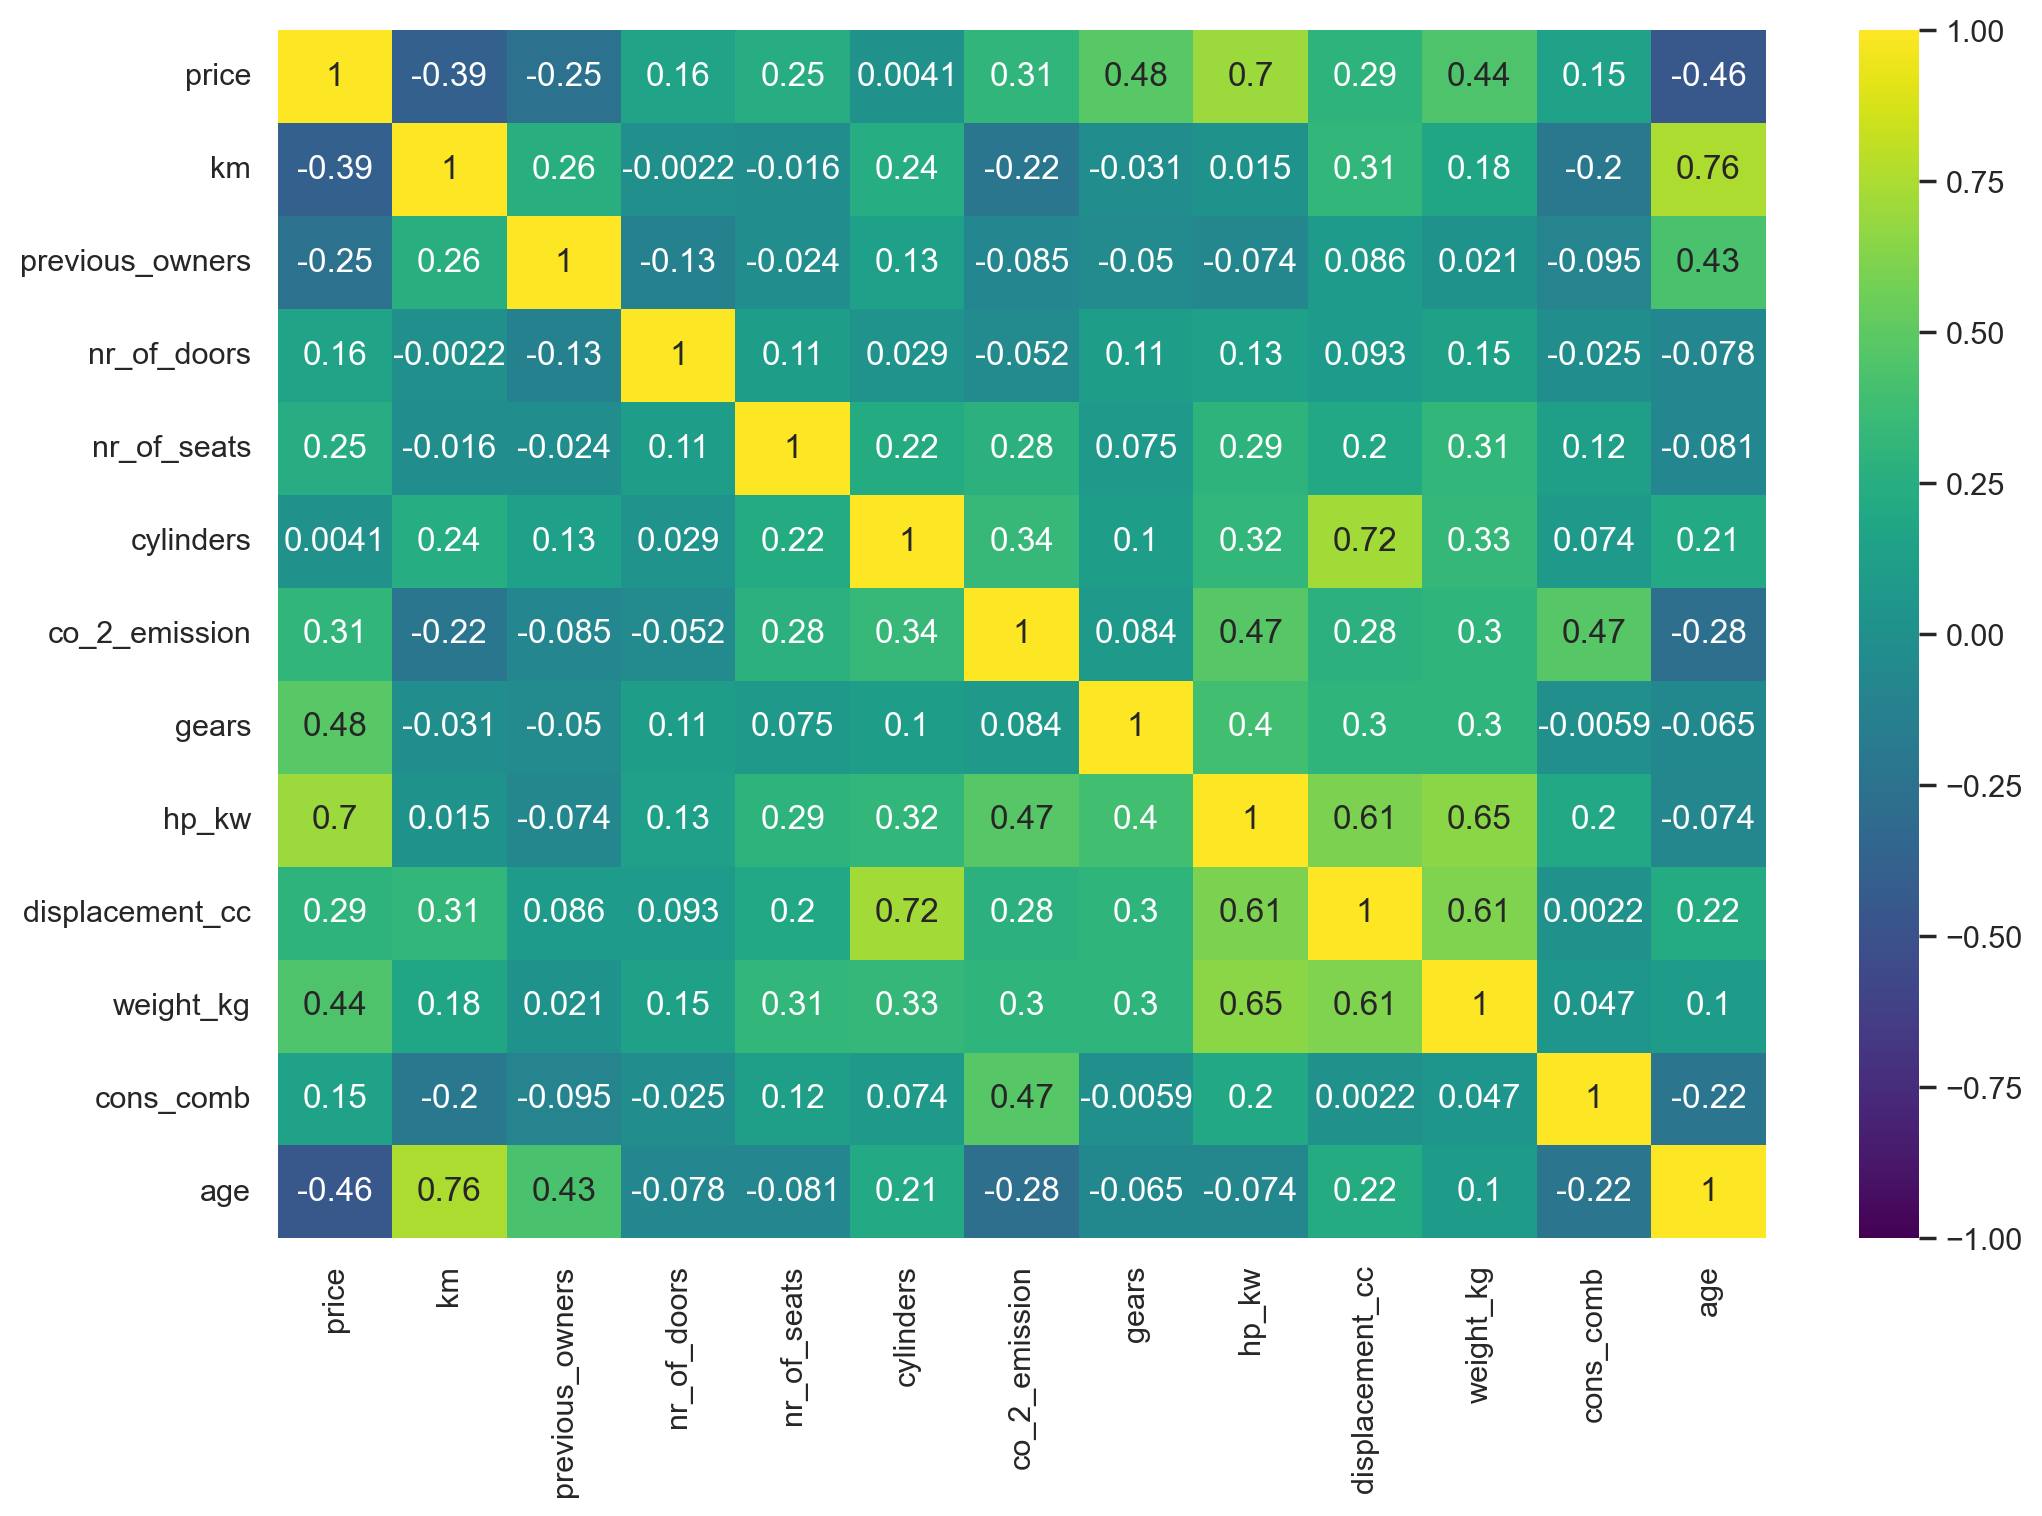

In [1371]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df_numeric.corr(), vmax=1.0, vmin=-1.0, cmap='viridis', annot=True);

In [1372]:
df.drop(["nr_of_doors"], axis=1, inplace=True)

In [1373]:
df.drop(["cylinders"], axis=1, inplace=True)

## Categorical Columns

In [1374]:
# Categorical to Quantitative relationship
# Categorical to Quantitative relationship
categorical_features = [i for i in df.columns if df.dtypes[i] == "object"]
categorical_features.append("price")

# Train set
df_categoric = df[categorical_features]

In [1375]:
categorical_features

['make_model',
 'body_type',
 'type',
 'body_color',
 'paint_type',
 'gearing_type',
 'drive_chain',
 'fuel',
 'emission_class',
 'comfort_convenience',
 'entertainment_media',
 'extras',
 'safety_security',
 'upholstery_type',
 'upholstery_color',
 'price']

In [1376]:
# taking columns having less then 15 nunique and appending price column for further analysis
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15049 entries, 0 to 15052
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make_model        15049 non-null  object
 1   body_type         15049 non-null  object
 2   type              15049 non-null  object
 3   body_color        15049 non-null  object
 4   paint_type        15049 non-null  object
 5   gearing_type      15049 non-null  object
 6   drive_chain       15049 non-null  object
 7   fuel              15049 non-null  object
 8   emission_class    15049 non-null  object
 9   upholstery_type   15049 non-null  object
 10  upholstery_color  15049 non-null  object
 11  price             15049 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 1.5+ MB


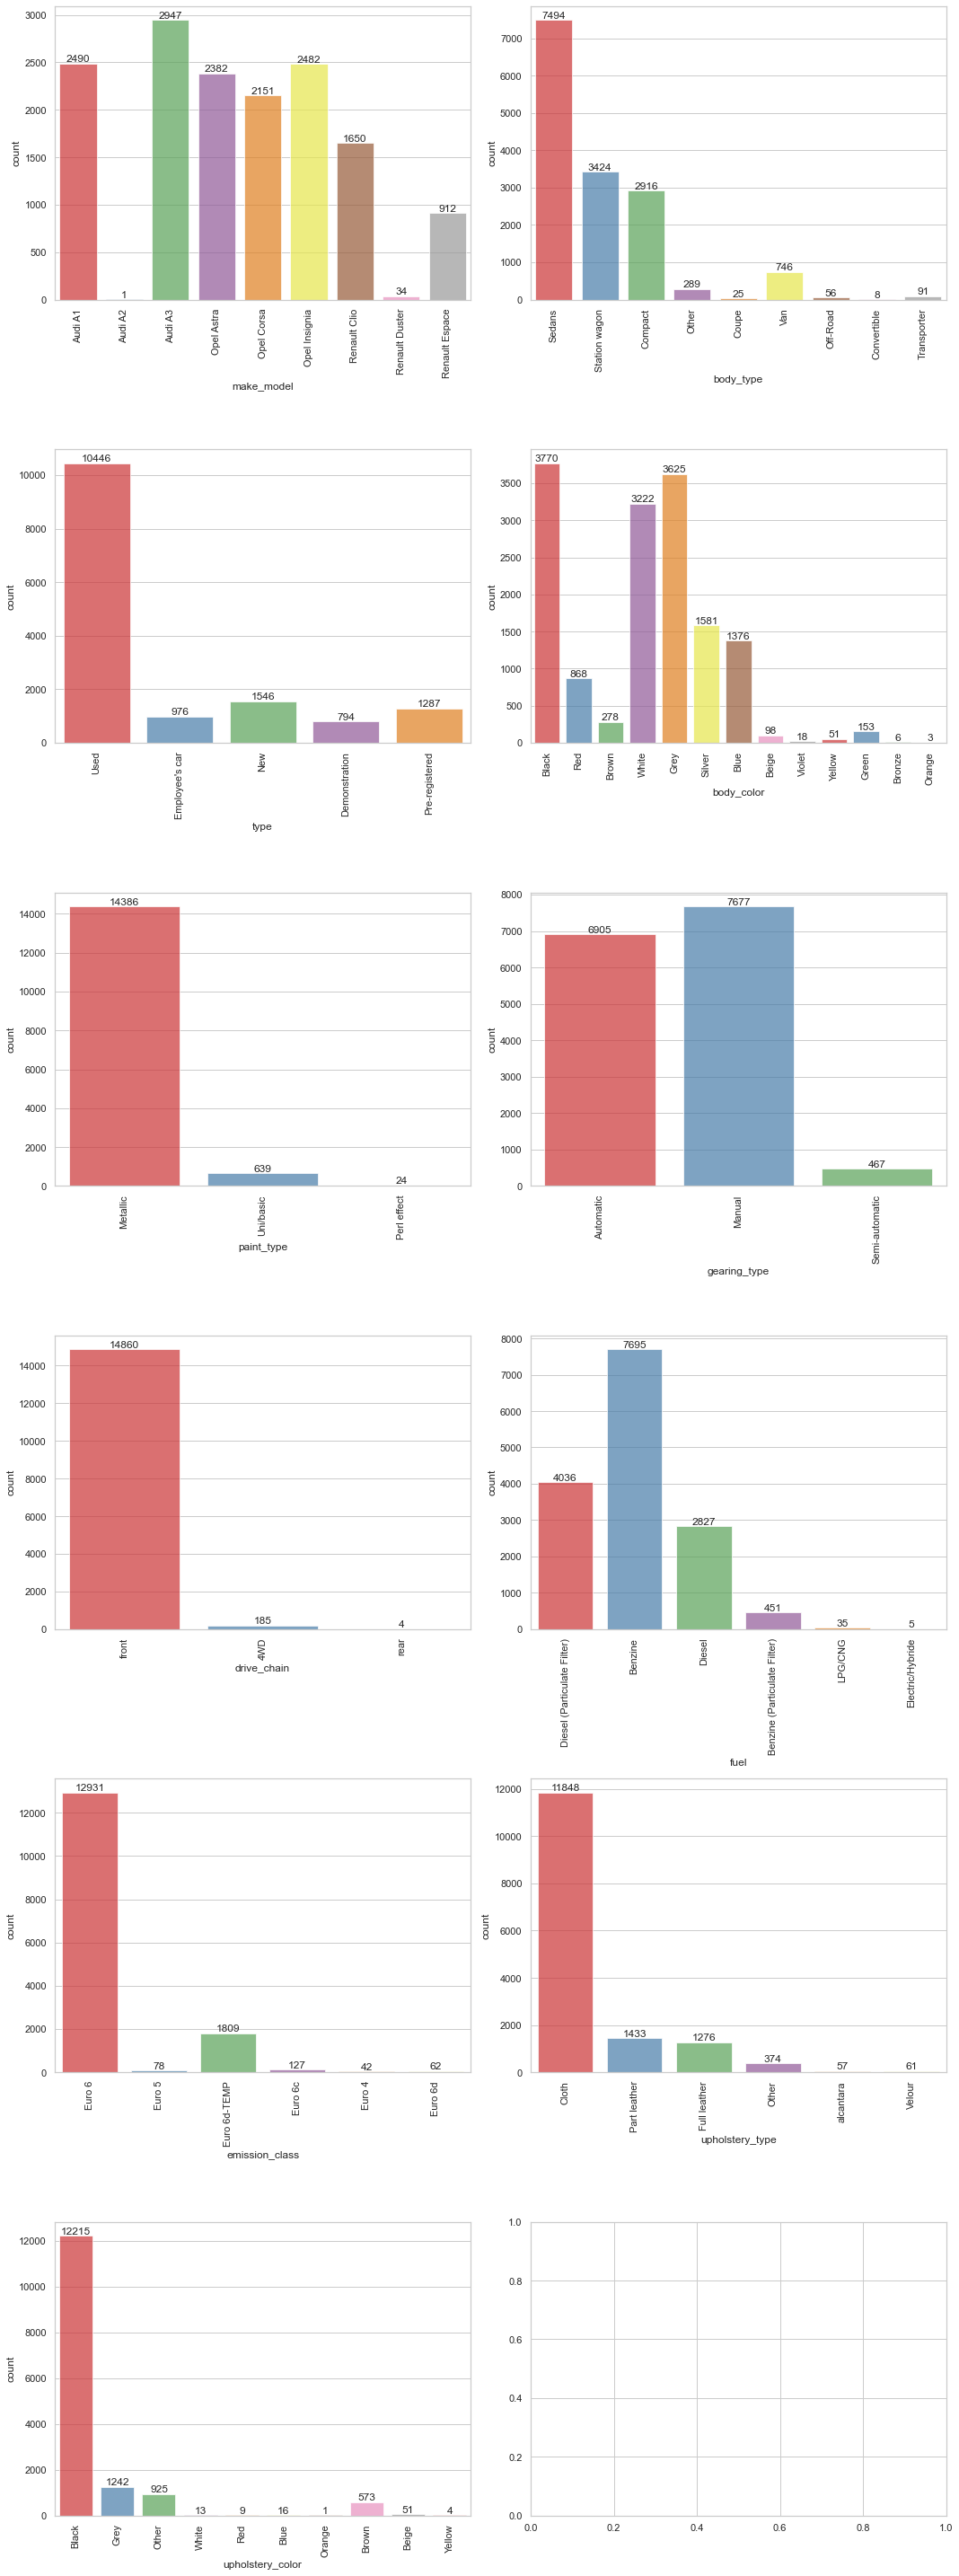

In [1377]:
fig, axes = plt.subplots(round(len(df_categoric.columns) / 2), 2, figsize=(15, 40))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        g = sns.countplot(x=df_categoric.columns[i], alpha=0.7, data=df_categoric, ax=ax, palette = "Set1")
        g.bar_label(g.containers[0])
fig.tight_layout()

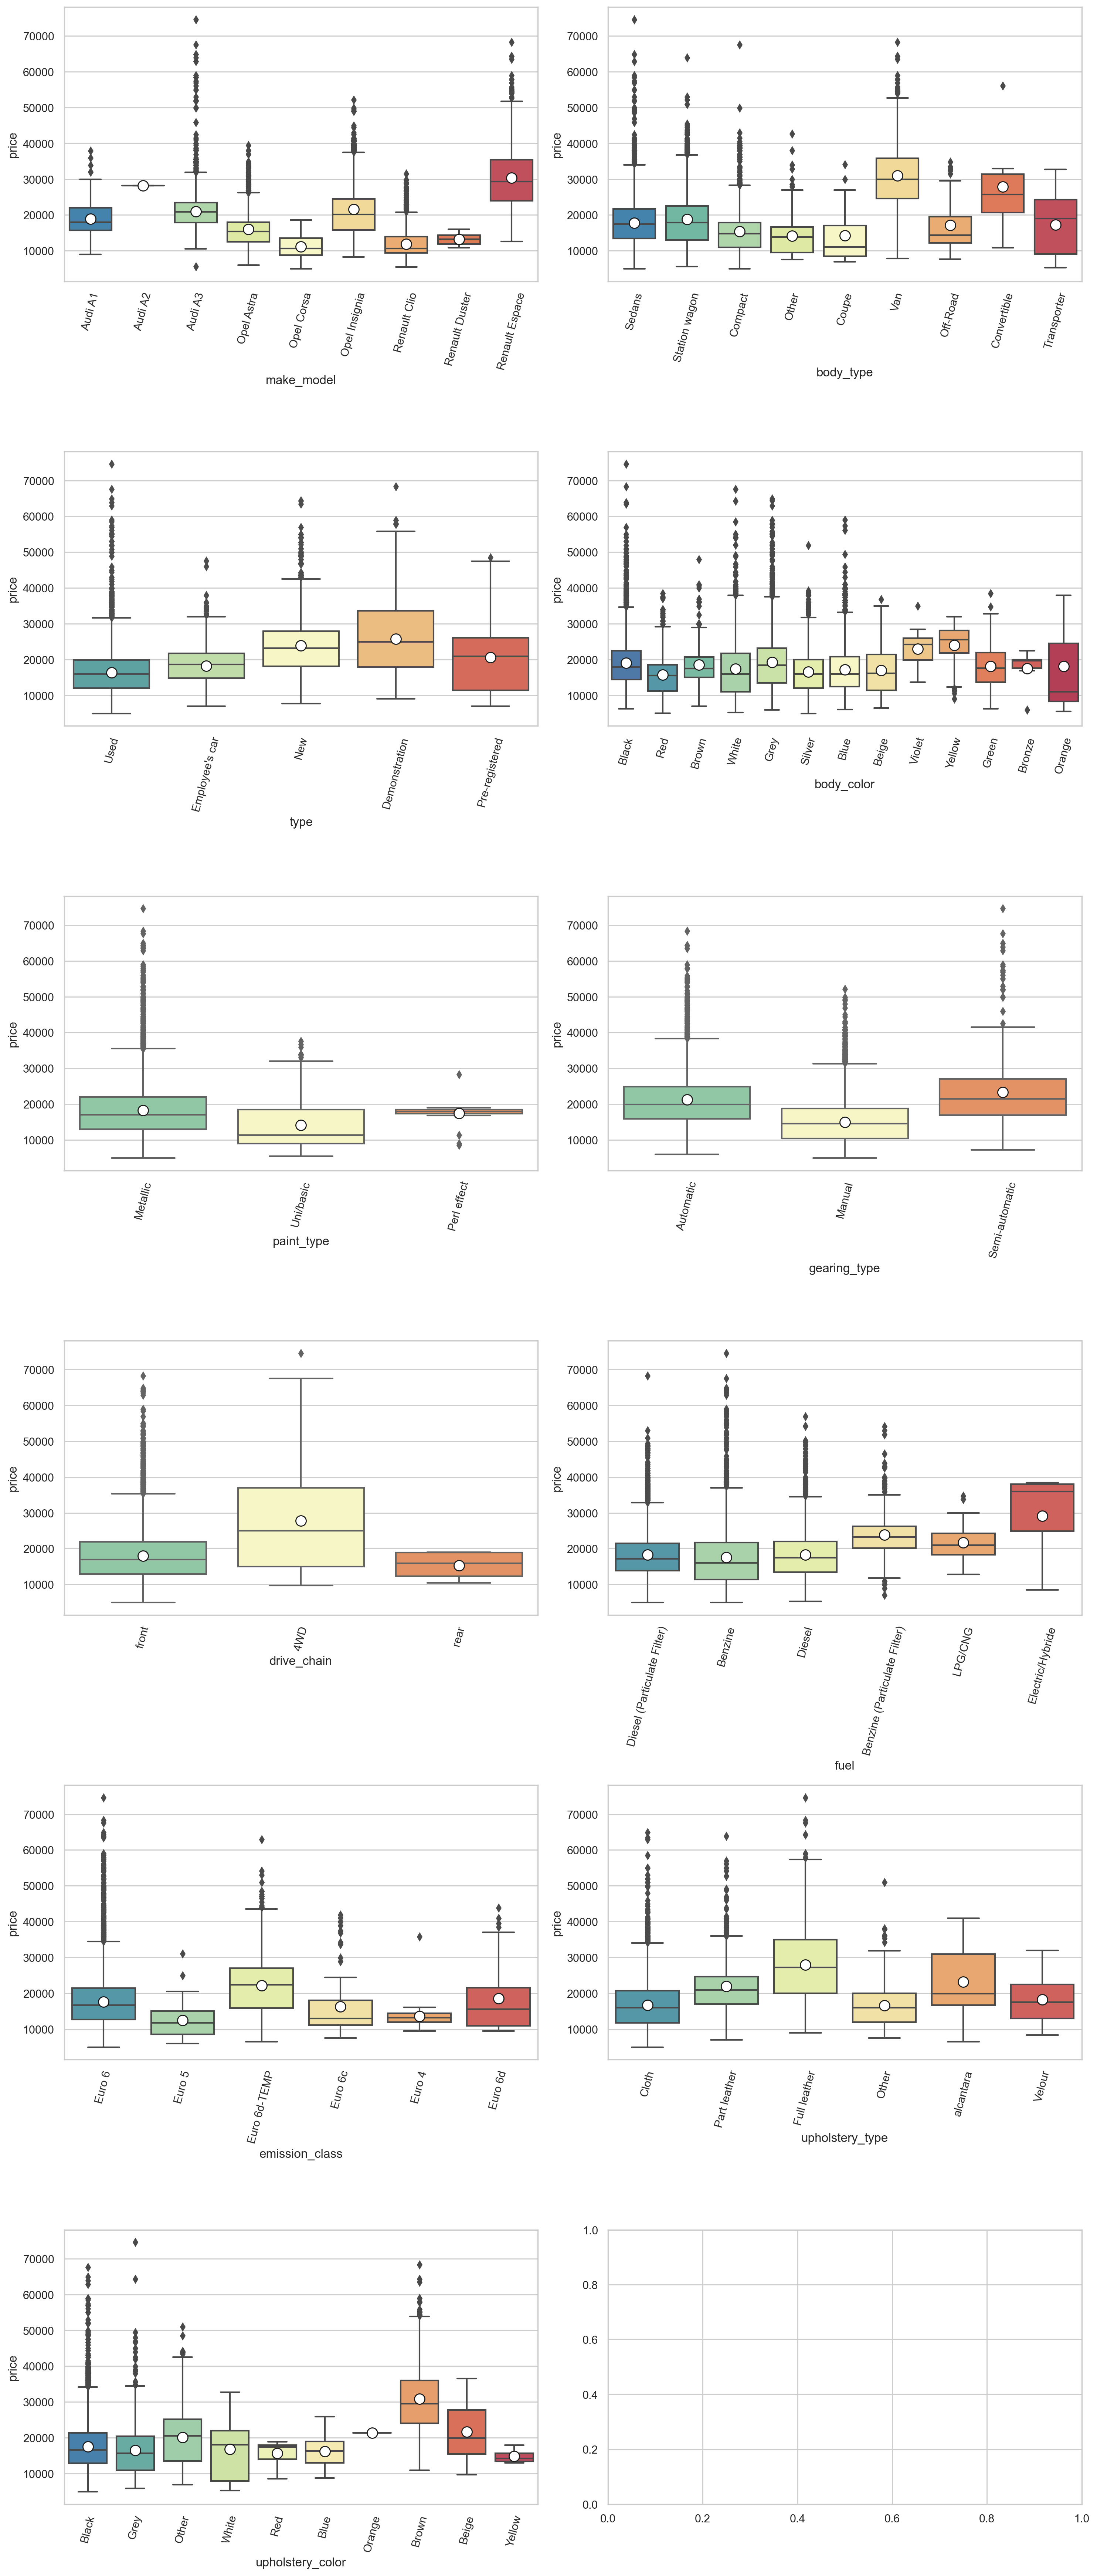

In [1378]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 35), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

In [1379]:
cols_to_drop = ["body_color", "upholstery_color", "emission_class"]
df_categoric.drop(cols_to_drop, axis=1, inplace=True)

In [1380]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [1381]:
df.shape

(15049, 23)

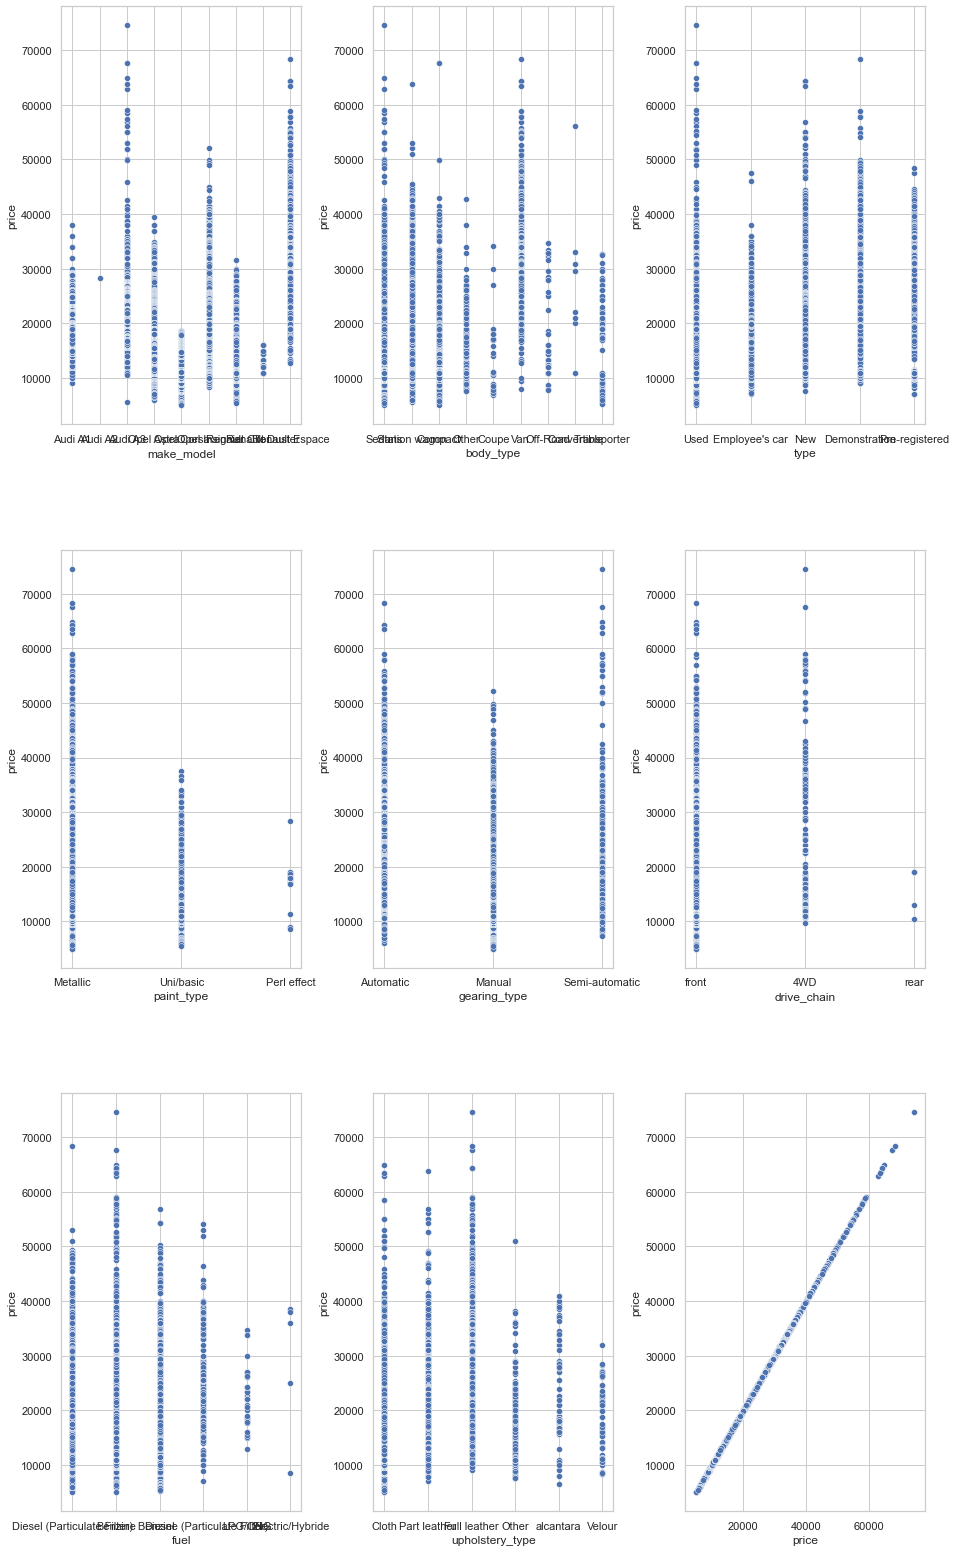

In [1382]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.3)

for i, col in enumerate(df_categoric.columns):
        plt.subplot(5,3,i+1)
        sns.scatterplot(x=col, y="price", data=df_categoric)

In [1383]:
df.price.value_counts().sort_index()

4950     1
4990     1
5250     1
5300     1
5445     1
        ..
64332    1
64900    1
67600    1
68320    1
74600    1
Name: price, Length: 2952, dtype: int64

# Final Step (Checking final situation of data via graphs)

## Scatter plot for final df numerical features

In [1384]:
df_numeric= df.select_dtypes(exclude=["object"])

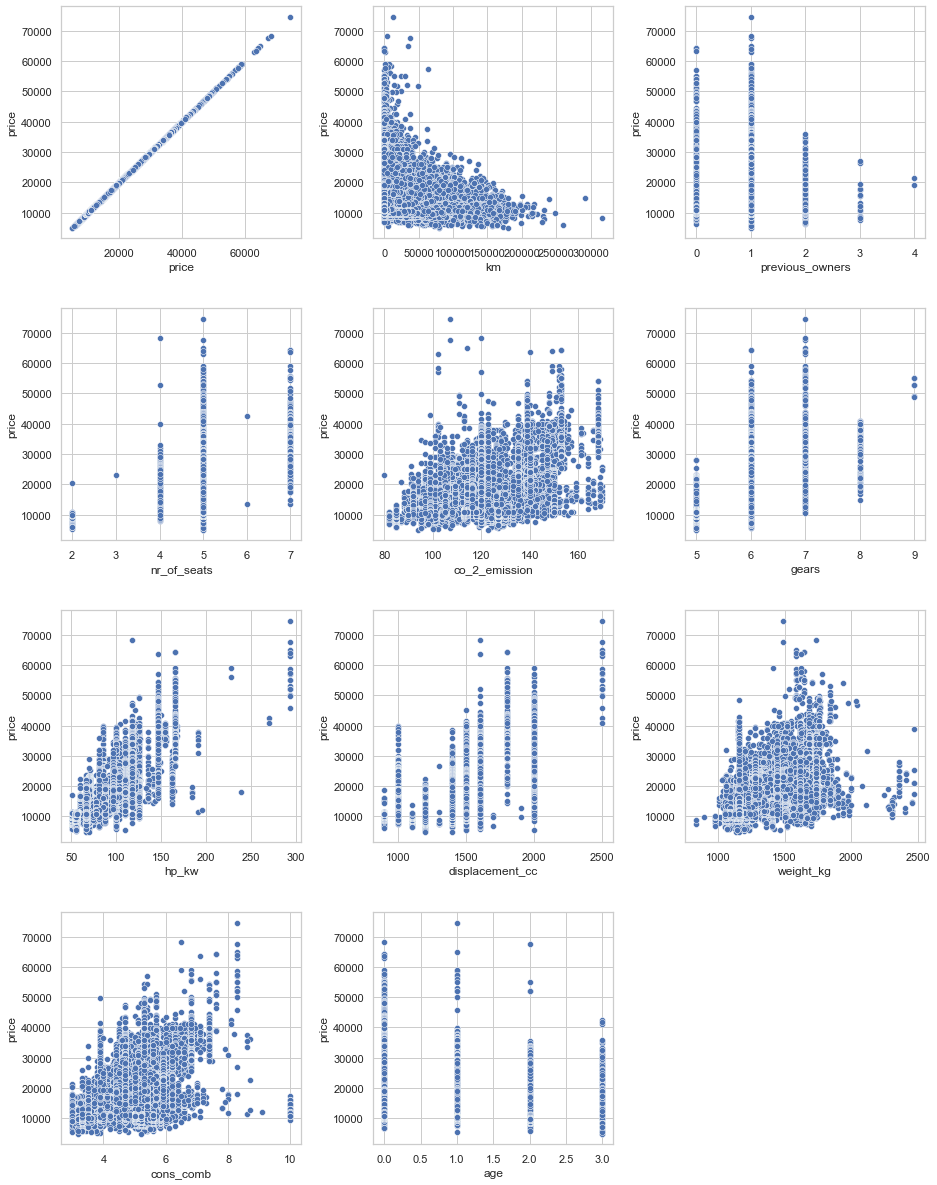

In [1385]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.scatterplot(y= "price", x=col, data=df_numeric)

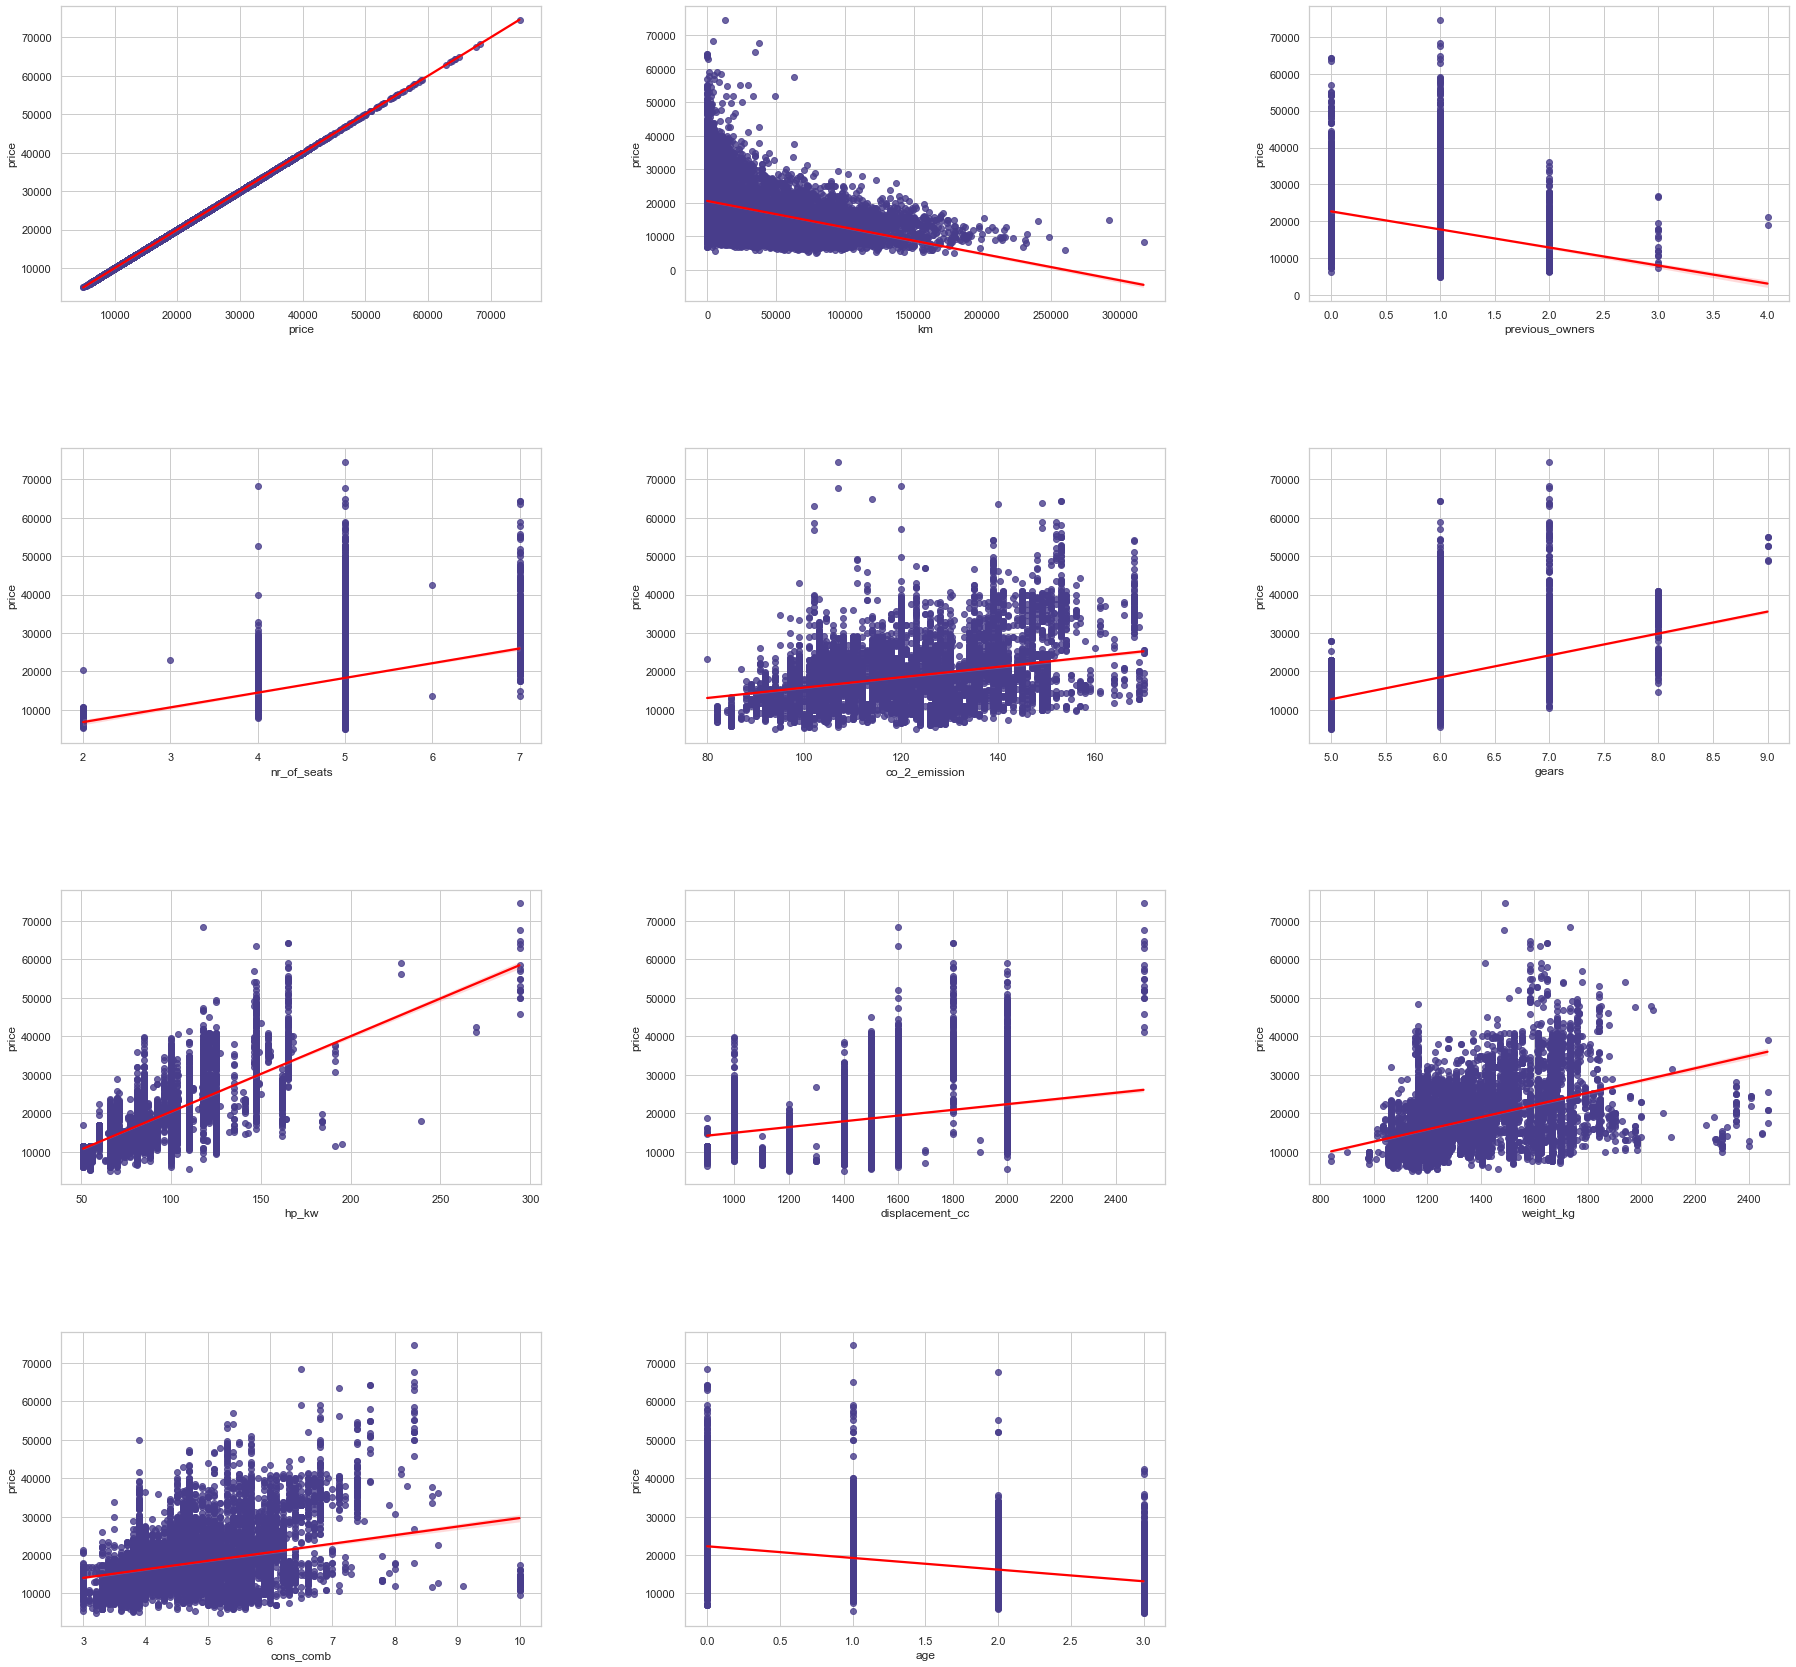

In [1386]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

## Boxplots for final df categorical features

In [1387]:
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15049 entries, 0 to 15052
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make_model       15049 non-null  object
 1   body_type        15049 non-null  object
 2   type             15049 non-null  object
 3   paint_type       15049 non-null  object
 4   gearing_type     15049 non-null  object
 5   drive_chain      15049 non-null  object
 6   fuel             15049 non-null  object
 7   upholstery_type  15049 non-null  object
 8   price            15049 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.7+ MB


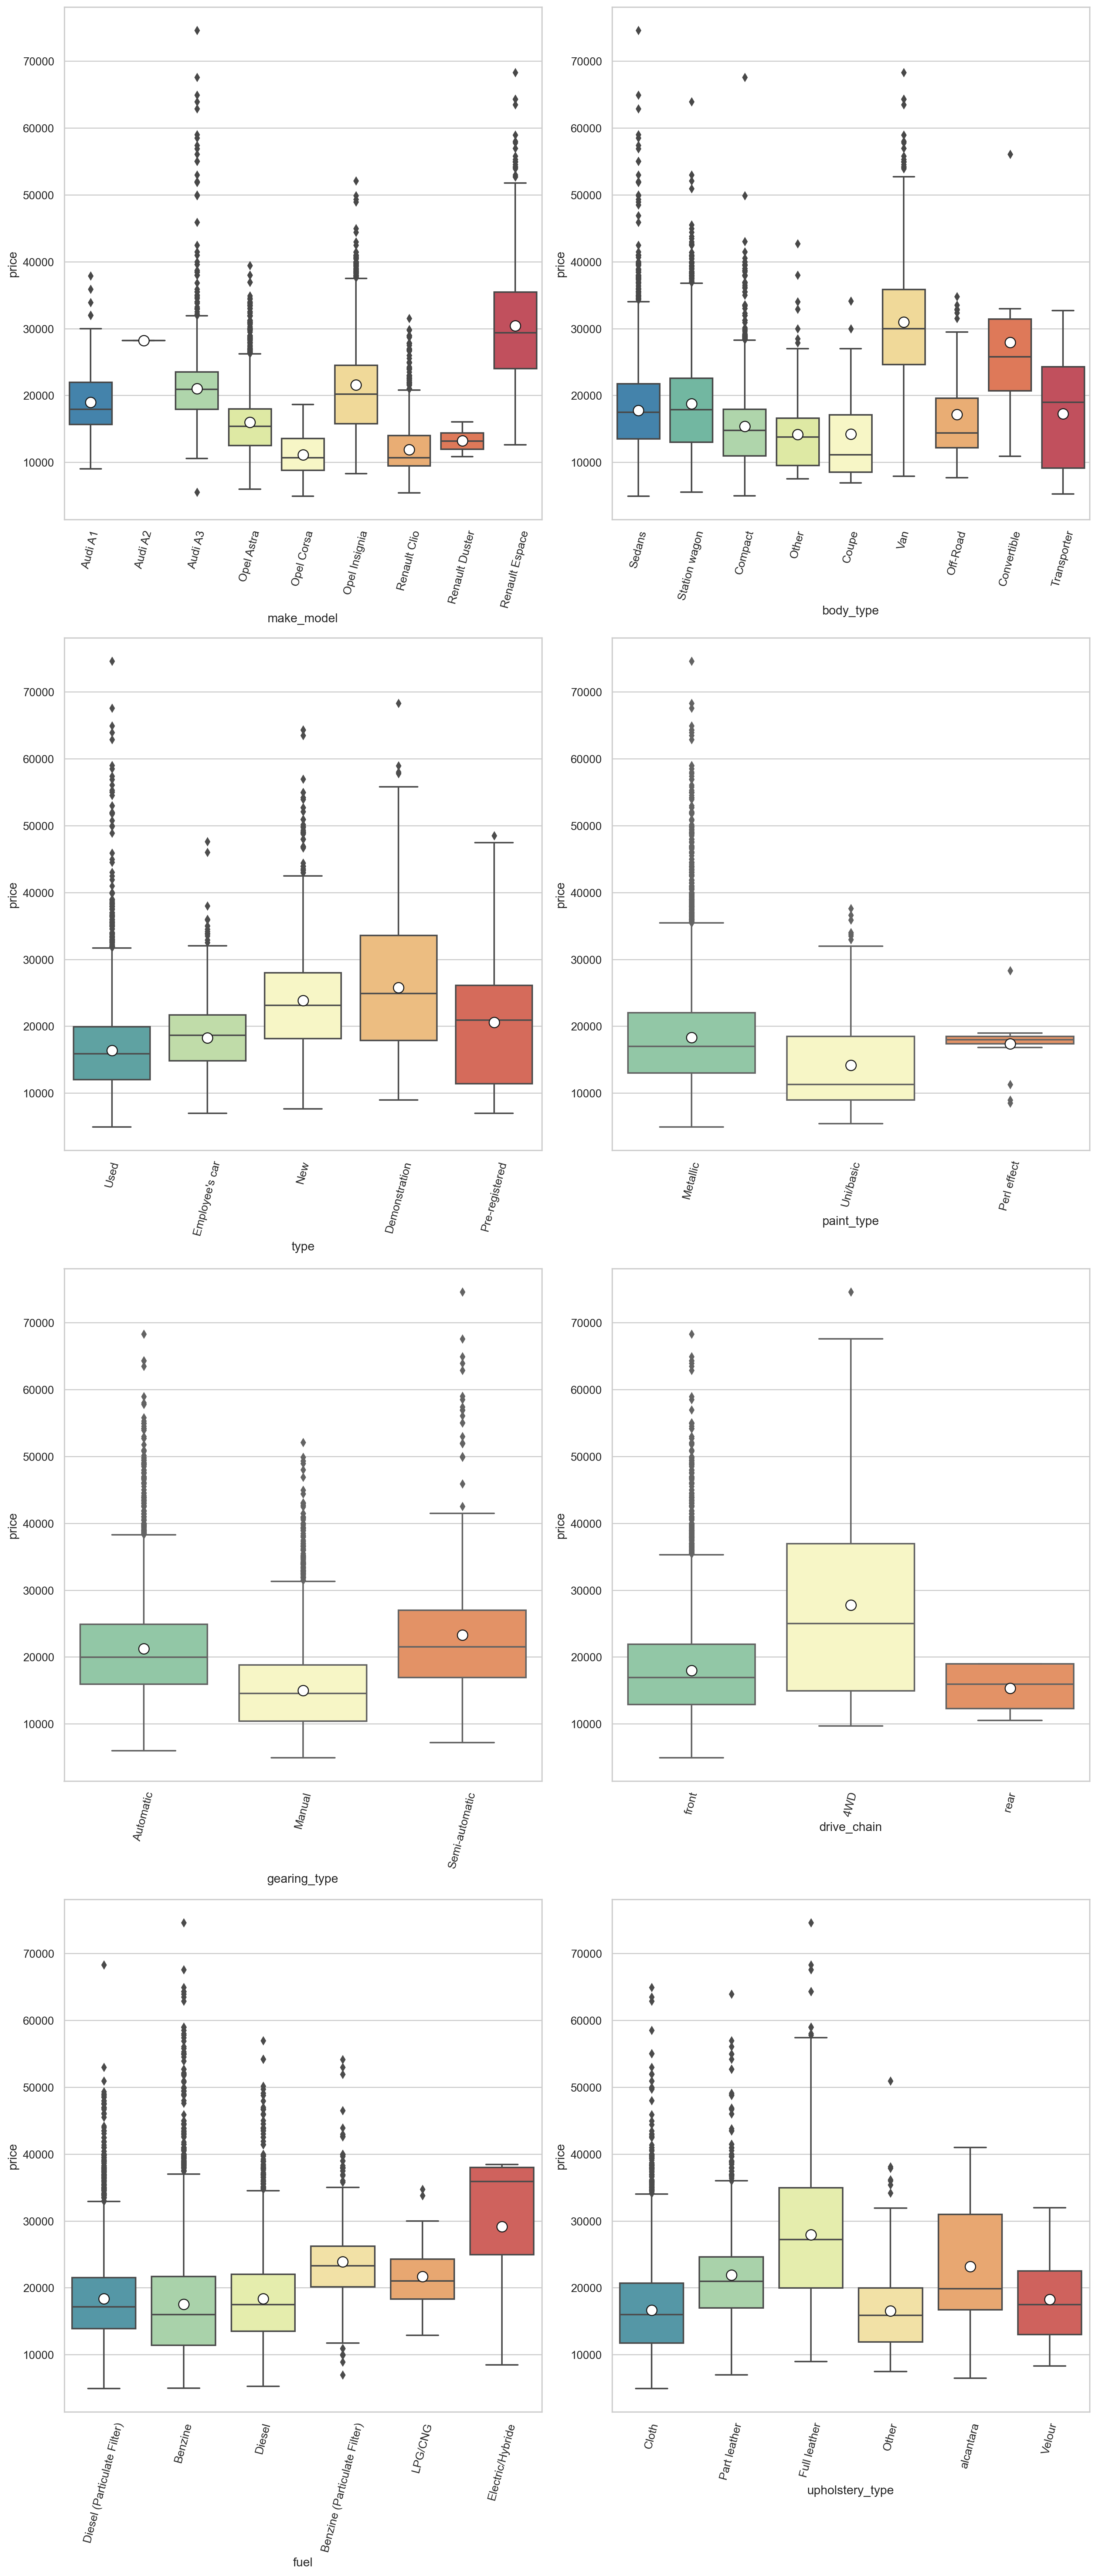

In [1388]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)//2), 2, figsize=(15, 35), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

## Export dataframe to csv file (without dummy)

In [1389]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

In [1390]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [1391]:
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15049 entries, 0 to 15048
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make_model       15049 non-null  object
 1   body_type        15049 non-null  object
 2   type             15049 non-null  object
 3   paint_type       15049 non-null  object
 4   gearing_type     15049 non-null  object
 5   drive_chain      15049 non-null  object
 6   fuel             15049 non-null  object
 7   upholstery_type  15049 non-null  object
dtypes: object(8)
memory usage: 940.7+ KB


In [1392]:
pd.get_dummies(data=df_categoric, columns= list(df_categoric.columns))

make_model_Audi A1  make_model_Audi A2  make_model_Audi A3  \
0                       1                   0                   0   
1                       1                   0                   0   
2                       1                   0                   0   
3                       1                   0                   0   
4                       1                   0                   0   
...                   ...                 ...                 ...   
15044                   0                   0                   0   
15045                   0                   0                   0   
15046                   0                   0                   0   
15047                   0                   0                   0   
15048                   0                   0                   0   

       make_model_Opel Astra  make_model_Opel Corsa  make_model_Opel Insignia  \
0                          0                      0                         0   
1                          0                      0                         0   
2                          0                      0                         0   
3                          0                      0                         0   
4                          0                      0                         0   
...                      ...                    ...                       ...   
15044                      0                      0                         0   
15045                      0                      0                         0   
15046                      0                      0                         0   
15047                      0                      0                         0   
15048                      0                      0                         0   

       make_model_Renault Clio  make_model_Renault Duster  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
15044                        0                          0   
15045                        0                          0   
15046                        0                          0   
15047                        0                          0   
15048                        0                          0   

       make_model_Renault Espace  body_type_Compact  body_type_Convertible  \
0                              0                  0                      0   
1                              0                  0                      0   
2                              0                  0                      0   
3                              0                  0                      0   
4                              0                  0                      0   
...                          ...                ...                    ...   
15044                          1                  0                      0   
15045                          1                  0                      0   
15046                          1                  0                      0   
15047                          1                  0                      0   
15048                          1                  0                      0   

       body_type_Coupe  body_type_Off-Road  body_type_Other  body_type_Sedans  \
0                    0                   0                0                 1   
1                    0                   0                0                 1   
2                    0                   0                0                 1   
3                    0                   0                0                 1   
4                    0                   0                0                 1   
...                ...                 ...       

In [1393]:
df_categoric=df.select_dtypes(include="O")
string_features = [i for i in df_categoric.columns if df_categoric[i].nunique() > 15]
df_string = df[string_features]
df_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15049 entries, 0 to 15048
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   comfort_convenience  15049 non-null  object
 1   entertainment_media  15049 non-null  object
 2   extras               15049 non-null  object
 3   safety_security      15049 non-null  object
dtypes: object(4)
memory usage: 470.4+ KB


In [1398]:
df_categoric.str.get_dummies(sep=",")

AttributeError: 'DataFrame' object has no attribute 'str'

In [1394]:
df_dummied = pd.get_dummies(data=df, columns=list(df.columns))

In [1395]:
df_dummied = df.join(df['comfort_convenience'].str.get_dummies(sep=',').add_prefix('cc_'))
df_dummied = df.join(df['entertainment_media'].str.get_dummies(sep=',').add_prefix('em_'))
df_dummied = df.join(df['extras'].str.get_dummies(sep=',').add_prefix('e_'))
df_dummied = df.join(df['safety_security'].str.get_dummies(sep=',').add_prefix('ss_'))
df_dummied.head()

make_model body_type  price       km  type  previous_owners paint_type  \
0    Audi A1    Sedans  15770  56013.0  Used              2.0   Metallic   
1    Audi A1    Sedans  14500  80000.0  Used              1.0   Metallic   
2    Audi A1    Sedans  14640  83450.0  Used              1.0   Metallic   
3    Audi A1    Sedans  14500  73000.0  Used              1.0   Metallic   
4    Audi A1    Sedans  16790  16200.0  Used              1.0   Metallic   

   nr_of_seats gearing_type drive_chain                         fuel  \
0          5.0    Automatic       front  Diesel (Particulate Filter)   
1          4.0    Automatic       front                      Benzine   
2          4.0    Automatic       front  Diesel (Particulate Filter)   
3          4.0    Automatic       front  Diesel (Particulate Filter)   
4          5.0    Automatic       front  Diesel (Particulate Filter)   

   co_2_emission                                comfort_convenience  \
0           99.0  Air conditioning,Armrest,Automatic climate con...   
1          129.0  Air conditioning,Automatic climate control,Hil...   
2           99.0  Air conditioning,Cruise control,Electrical sid...   
3           99.0  Air suspension,Armrest,Auxiliary heating,Elect...   
4          109.0  Air conditioning,Armrest,Automatic climate con...   

                                 entertainment_media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     safety_security  gears  hp_kw  \
0  ABS,Central door lock,Daytime running lights,D...    7.0   66.0   
1  ABS,Central door lock,Central door lock with r...    7.0  141.0   
2  ABS,Central door lock,Daytime running lights,D...    7.0   85.0   
3  ABS,Alarm system,Central door lock with remote...    6.0   66.0   
4  ABS,Central door lock,Driver-side airbag,Elect...    7.0   66.0   

  upholstery_type  displacement_cc  weight_kg  cons_comb  age  ss_ABS  \
0           Cloth           1400.0     1220.0        3.8  3.0       1   
1           Cloth           1800.0     1255.0        5.6  2.0       1   
2           Cloth           1600.0     1275.0        3.8  3.0       1   
3           Cloth           1400.0     1195.0        3.8  3.0       1   
4           Cloth           1400.0     1220.0        4.1  3.0       1   

   ss_Adaptive Cruise Control  ss_Adaptive headlights  ss_Alarm system  \
0                           0                       0                0   
1                           0                       0                0   
2                           0                       0                0   
3                           0                       0                1   
4                           0                       0                0   

   ss_Blind spot monitor  ss_Central door lock  \
0                      0                     1   
1                      0                     1   
2                      0                     1   
3                      0                     0   
4                      0                     1   

   ss_Central door lock with remote control  ss_Daytime running lights  \
0                                         0                          1   
1                                         1                          1   
2                                         0                          1   
3                                         1                          0   
4                                  

In [1397]:
df_dummied.drop(["comfort_convenience", "entertainment_media", "extras", "safety_security"], axis=1, inplace=True)

KeyError: "['comfort_convenience' 'entertainment_media' 'extras' 'safety_security'] not found in axis"

## Export dataframe to csv file (dummy)

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)